In [ ]:
from google.colab import drive

# Unmount Google Drive
drive.flush_and_unmount()
print('Google Drive has been disconnected.')


Drive not mounted, so nothing to flush and unmount.
Google Drive has been disconnected.


In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Load the CSV file into a DataFrame
file_path = '/content/drive/My Drive/Brand Engagement.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

Mounted at /content/drive


,BEFactor1-Q1,BEFactor1-Q2,BEFactor2-Q1,BEFactor2-Q2,BEFactor3-Q1,BEFactor3-Q2
0,3,3,2,3,4,3
1,1,2,1,1,3,2
2,2,3,2,2,2,3
3,1,2,2,2,2,2
4,1,1,1,1,1,2


In [ ]:
!pip install semopy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 8.0 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659682 sha256=24154c9cb78dd0c643c7245a44d37a71f3cf5743f899b4afa3076fa475276b5e
  Stored in directory: /root/.cache/pip/wheels/53/ec/0d/0b294c02d8c4e9e80afea58839f2c1b4706770594bc99ec045
Successfully built semopy


In [ ]:
!pip install networkx

In [ ]:
import pandas as pd

# بارگذاری داده‌ها از گوگل درایو
file_path = '/content/drive/My Drive/Brand Engagement.csv'
data = pd.read_csv(file_path)

# محاسبه میانگین برای ایجاد فاکتور اصلی (Brand Engagement)
data['Brand Engagement'] = data.mean(axis=1)

# محاسبه ماتریس همبستگی
correlation_matrix = data.corr()

# استخراج همبستگی هر سوال نسبت به Brand Engagement
correlation_with_be = correlation_matrix['Brand Engagement'].drop('Brand Engagement')
print("Correlation of each question with Brand Engagement:")
print(correlation_with_be)


Correlation of each question with Brand Engagement:
BEFactor1-Q1    0.757867
BEFactor1-Q2    0.865176
BEFactor2-Q1    0.833603
BEFactor2-Q2    0.737750
BEFactor3-Q1    0.864780
BEFactor3-Q2    0.497254
Name: Brand Engagement, dtype: float64


In [ ]:
!pip install factor-analyzer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42565 sha256=49caea74fb0763e3fd2aa54f2dd3da57a505f04319017e3ff13b77f90800025f
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor-analyzer


In [ ]:
!pip install factor-analyzer


Correlation Matrix:
              BEFactor1-Q1  BEFactor1-Q2  BEFactor1
BEFactor1-Q1      1.000000      0.555061   0.892696
BEFactor1-Q2      0.555061      1.000000   0.870363
BEFactor1         0.892696      0.870363   1.000000
Path Analysis Results:
        lval  op       rval  Estimate  Std. Err    z-value   p-value
0  BEFactor1   ~  BEFactor1 -0.020106  0.021053  -0.955045  0.339555
1  BEFactor1  ~~  BEFactor1  0.421219  0.025493  16.523031  0.000000


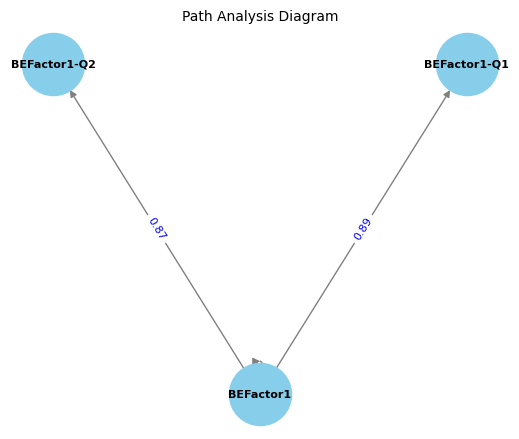

In [ ]:
import pandas as pd
from semopy import Model
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy import stats

# Load data from Google Drive
file_path = '/content/drive/My Drive/Brand Engagement.csv'
data = pd.read_csv(file_path)

# Remove outliers using Z-Score
data = data[(np.abs(stats.zscore(data.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

# Create BEFactor1 variable as the mean of related questions
data['BEFactor1'] = data[['BEFactor1-Q1', 'BEFactor1-Q2']].mean(axis=1)

# Calculate the correlation matrix
correlation_matrix = data[['BEFactor1-Q1', 'BEFactor1-Q2', 'BEFactor1']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Define the SEM model for path analysis between questions and BEFactor1
model_desc = """
BEFactor1 ~ BEFactor1-Q1 + BEFactor1-Q2
"""

# Build the model
model = Model(model_desc)

# Load data into the model
model.load_dataset(data)

# Fit the model to the data
model.fit()

# Display the results
params = model.inspect()
print("Path Analysis Results:")
print(params)

# Draw the path analysis diagram using networkx
def draw_path_diagram(params, corr_matrix):
    G = nx.DiGraph()

    # Add nodes and edges (reversed direction)
    G.add_edges_from([
        ("BEFactor1", "BEFactor1-Q1"),
        ("BEFactor1", "BEFactor1-Q2")
    ])

    # Get weights from path analysis results
    labels = {}
    for index, row in params.iterrows():
        if row['op'] == '~':
            G.add_edge(row['lval'], row['rval'], weight=row['Estimate'])
            labels[(row['lval'], row['rval'])] = f"{row['Estimate']:.2f}"

    # Get correlations from the correlation matrix
    corr_labels = {
        ('BEFactor1', 'BEFactor1-Q1'): f"{corr_matrix.loc['BEFactor1-Q1', 'BEFactor1']:.2f}",
        ('BEFactor1', 'BEFactor1-Q2'): f"{corr_matrix.loc['BEFactor1-Q2', 'BEFactor1']:.2f}"
    }

    # Position settings for better arrow display
    pos = {
        "BEFactor1": (0.5, 0.5),
        "BEFactor1-Q1": (1, 0.8),
        "BEFactor1-Q2": (0, 0.8)
    }

    plt.figure(figsize=(5, 4))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=8, font_weight='bold', edge_color='gray')

    # Display correlation values on edges
    nx.draw_networkx_edge_labels(G, pos, edge_labels=corr_labels, font_color='blue', font_size=8)

    plt.title("Path Analysis Diagram", fontsize=10)
    plt.show()

# Show the path analysis diagram
draw_path_diagram(params, correlation_matrix)


Correlation Matrix:
              BEFactor1-Q1  BEFactor1-Q2  BEFactor1
BEFactor1-Q1      1.000000      0.555061   0.892696
BEFactor1-Q2      0.555061      1.000000   0.870363
BEFactor1         0.892696      0.870363   1.000000
Path Analysis Results:
        lval  op       rval  Estimate  Std. Err    z-value   p-value
0  BEFactor1   ~  BEFactor1 -0.020106  0.021053  -0.955045  0.339555
1  BEFactor1  ~~  BEFactor1  0.421219  0.025493  16.523031  0.000000


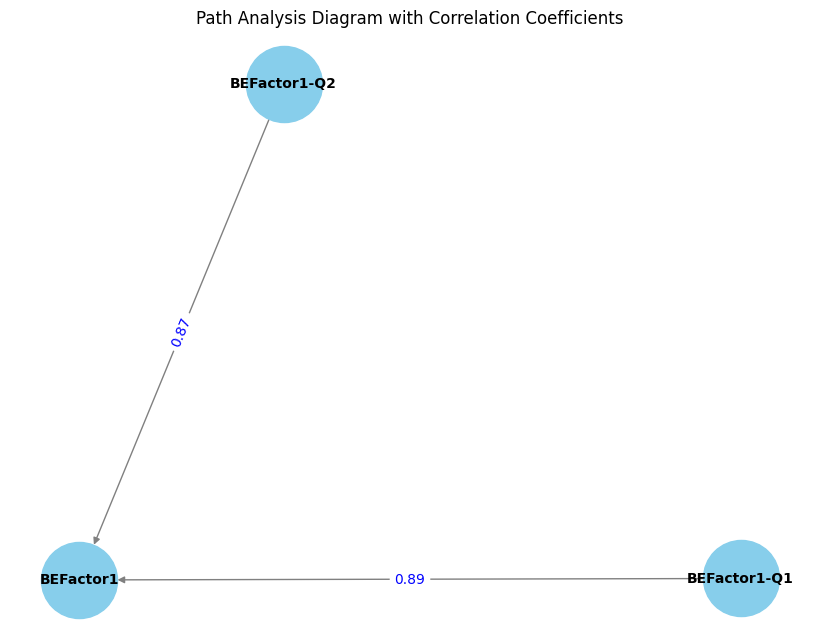

In [ ]:
import pandas as pd
from semopy import Model
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy import stats

# بارگذاری داده‌ها از گوگل درایو
file_path = '/content/drive/My Drive/Brand Engagement.csv'
data = pd.read_csv(file_path)

# حذف داده‌های پرت با استفاده از Z-Score
data = data[(np.abs(stats.zscore(data.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

# ایجاد متغیر BEFactor1 به عنوان میانگین سوالات مربوط به فاکتور
data['BEFactor1'] = data[['BEFactor1-Q1', 'BEFactor1-Q2']].mean(axis=1)

# محاسبه ماتریس همبستگی
correlation_matrix = data[['BEFactor1-Q1', 'BEFactor1-Q2', 'BEFactor1']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# تعریف مدل SEM برای تحلیل مسیر بین سوالات و متغیر BEFactor1
model_desc = """
BEFactor1 ~ BEFactor1-Q1 + BEFactor1-Q2
"""

# ساخت مدل
model = Model(model_desc)

# بارگذاری داده‌ها به مدل
model.load_dataset(data)

# برازش مدل به داده‌ها
model.fit()

# نمایش نتایج
params = model.inspect()
print("Path Analysis Results:")
print(params)

# رسم شکل تحلیل مسیر با استفاده از networkx
def draw_path_diagram(params, corr_matrix):
    G = nx.DiGraph()

    # اضافه کردن گره‌ها و لبه‌ها
    G.add_edges_from([
        ("BEFactor1-Q1", "BEFactor1"),
        ("BEFactor1-Q2", "BEFactor1")
    ])

    # دریافت همبستگی‌ها از ماتریس همبستگی
    corr_labels = {
        ('BEFactor1-Q1', 'BEFactor1'): f"{corr_matrix.loc['BEFactor1-Q1', 'BEFactor1']:.2f}",
        ('BEFactor1-Q2', 'BEFactor1'): f"{corr_matrix.loc['BEFactor1-Q2', 'BEFactor1']:.2f}"
    }

    pos = nx.spring_layout(G)
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')

    # نمایش مقادیر همبستگی روی لبه‌ها
    nx.draw_networkx_edge_labels(G, pos, edge_labels=corr_labels, font_color='blue')

    plt.title("Path Analysis Diagram with Correlation Coefficients")
    plt.show()

# نمایش شکل تحلیل مسیر
draw_path_diagram(params, correlation_matrix)


Correlation Matrix:
              BEFactor2-Q1  BEFactor2-Q2  BEFactor2
BEFactor2-Q1      1.000000      0.430942   0.831341
BEFactor2-Q2      0.430942      1.000000   0.859769
BEFactor2         0.831341      0.859769   1.000000
Path Analysis Results:
        lval  op       rval  Estimate  Std. Err    z-value       p-value
0  BEFactor2   ~  BEFactor2 -0.186073  0.023151  -8.037210  8.881784e-16
1  BEFactor2  ~~  BEFactor2  0.467728  0.029354  15.934085  0.000000e+00


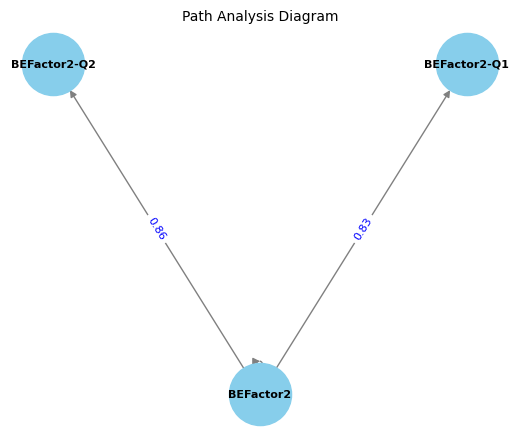

In [ ]:
import pandas as pd
from semopy import Model
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy import stats

# Load data from Google Drive
file_path = '/content/drive/My Drive/Brand Engagement.csv'
data = pd.read_csv(file_path)

# Remove outliers using Z-Score
data = data[(np.abs(stats.zscore(data.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

# Create BEFactor2 variable as the mean of related questions
data['BEFactor2'] = data[['BEFactor2-Q1', 'BEFactor2-Q2']].mean(axis=1)

# Calculate the correlation matrix
correlation_matrix = data[['BEFactor2-Q1', 'BEFactor2-Q2', 'BEFactor2']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Define the SEM model for path analysis between questions and BEFactor2
model_desc = """
BEFactor2 ~ BEFactor2-Q1 + BEFactor2-Q2
"""

# Build the model
model = Model(model_desc)

# Load data into the model
model.load_dataset(data)

# Fit the model to the data
model.fit()

# Display the results
params = model.inspect()
print("Path Analysis Results:")
print(params)

# Draw the path analysis diagram using networkx
def draw_path_diagram(params, corr_matrix):
    G = nx.DiGraph()

    # Add nodes and edges (reversed direction)
    G.add_edges_from([
        ("BEFactor2", "BEFactor2-Q1"),
        ("BEFactor2", "BEFactor2-Q2")
    ])

    # Get weights from path analysis results
    labels = {}
    for index, row in params.iterrows():
        if row['op'] == '~':
            G.add_edge(row['lval'], row['rval'], weight=row['Estimate'])
            labels[(row['lval'], row['rval'])] = f"{row['Estimate']:.2f}"

    # Get correlations from the correlation matrix
    corr_labels = {
        ('BEFactor2', 'BEFactor2-Q1'): f"{corr_matrix.loc['BEFactor2-Q1', 'BEFactor2']:.2f}",
        ('BEFactor2', 'BEFactor2-Q2'): f"{corr_matrix.loc['BEFactor2-Q2', 'BEFactor2']:.2f}"
    }

    # Position settings for better arrow display
    pos = {
        "BEFactor2": (0.5, 0.5),
        "BEFactor2-Q1": (1, 0.8),
        "BEFactor2-Q2": (0, 0.8)
    }

    plt.figure(figsize=(5, 4))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=8, font_weight='bold', edge_color='gray')

    # Display correlation values on edges
    nx.draw_networkx_edge_labels(G, pos, edge_labels=corr_labels, font_color='blue', font_size=8)

    plt.title("Path Analysis Diagram", fontsize=10)
    plt.show()

# Show the path analysis diagram
draw_path_diagram(params, correlation_matrix)


Correlation Matrix:
              BEFactor2-Q1  BEFactor2-Q2  BEFactor2
BEFactor2-Q1      1.000000      0.430942   0.831341
BEFactor2-Q2      0.430942      1.000000   0.859769
BEFactor2         0.831341      0.859769   1.000000
Path Analysis Results:
        lval  op       rval  Estimate  Std. Err    z-value       p-value
0  BEFactor2   ~  BEFactor2 -0.186073  0.023151  -8.037210  8.881784e-16
1  BEFactor2  ~~  BEFactor2  0.467728  0.029354  15.934085  0.000000e+00


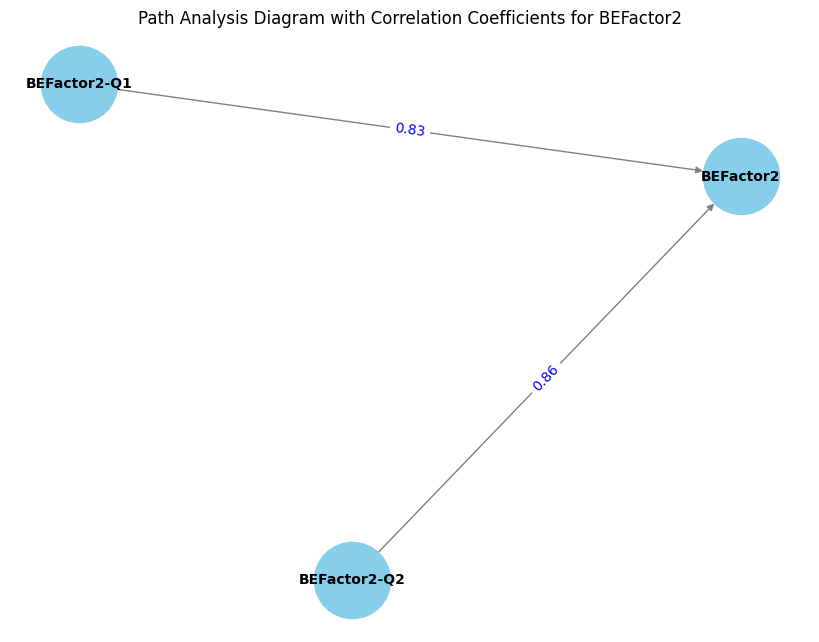

In [ ]:
import pandas as pd
from semopy import Model
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy import stats

# بارگذاری داده‌ها از گوگل درایو
file_path = '/content/drive/My Drive/Brand Engagement.csv'
data = pd.read_csv(file_path)

# حذف داده‌های پرت با استفاده از Z-Score
data = data[(np.abs(stats.zscore(data.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

# ایجاد متغیر BEFactor2 به عنوان میانگین سوالات مربوط به فاکتور
data['BEFactor2'] = data[['BEFactor2-Q1', 'BEFactor2-Q2']].mean(axis=1)

# محاسبه ماتریس همبستگی
correlation_matrix = data[['BEFactor2-Q1', 'BEFactor2-Q2', 'BEFactor2']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# تعریف مدل SEM برای تحلیل مسیر بین سوالات و متغیر BEFactor2
model_desc = """
BEFactor2 ~ BEFactor2-Q1 + BEFactor2-Q2
"""

# ساخت مدل
model = Model(model_desc)

# بارگذاری داده‌ها به مدل
model.load_dataset(data)

# برازش مدل به داده‌ها
model.fit()

# نمایش نتایج
params = model.inspect()
print("Path Analysis Results:")
print(params)

# رسم شکل تحلیل مسیر با استفاده از networkx
def draw_path_diagram(params, corr_matrix):
    G = nx.DiGraph()

    # اضافه کردن گره‌ها و لبه‌ها
    G.add_edges_from([
        ("BEFactor2-Q1", "BEFactor2"),
        ("BEFactor2-Q2", "BEFactor2")
    ])

    # دریافت همبستگی‌ها از ماتریس همبستگی
    corr_labels = {
        ('BEFactor2-Q1', 'BEFactor2'): f"{corr_matrix.loc['BEFactor2-Q1', 'BEFactor2']:.2f}",
        ('BEFactor2-Q2', 'BEFactor2'): f"{corr_matrix.loc['BEFactor2-Q2', 'BEFactor2']:.2f}"
    }

    pos = nx.spring_layout(G)
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')

    # نمایش مقادیر همبستگی روی لبه‌ها
    nx.draw_networkx_edge_labels(G, pos, edge_labels=corr_labels, font_color='blue')

    plt.title("Path Analysis Diagram with Correlation Coefficients for BEFactor2")
    plt.show()

# نمایش شکل تحلیل مسیر
draw_path_diagram(params, correlation_matrix)


Correlation Matrix:
              BEFactor3-Q1  BEFactor3-Q2  BEFactor3
BEFactor3-Q1      1.000000      0.290182   0.826843
BEFactor3-Q2      0.290182      1.000000   0.778168
BEFactor3         0.826843      0.778168   1.000000
Path Analysis Results:
        lval  op       rval  Estimate  Std. Err    z-value       p-value
0  BEFactor3   ~  BEFactor3 -0.154957  0.022666  -6.836504  8.114842e-12
1  BEFactor3  ~~  BEFactor3  0.457460  0.028613  15.987936  0.000000e+00


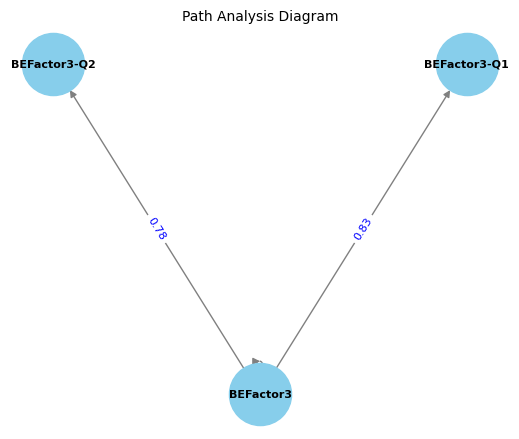

In [ ]:
import pandas as pd
from semopy import Model
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy import stats

# Load data from Google Drive
file_path = '/content/drive/My Drive/Brand Engagement.csv'
data = pd.read_csv(file_path)

# Remove outliers using Z-Score
data = data[(np.abs(stats.zscore(data.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

# Create BEFactor3 variable as the mean of related questions
data['BEFactor3'] = data[['BEFactor3-Q1', 'BEFactor3-Q2']].mean(axis=1)

# Calculate the correlation matrix
correlation_matrix = data[['BEFactor3-Q1', 'BEFactor3-Q2', 'BEFactor3']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Define the SEM model for path analysis between questions and BEFactor3
model_desc = """
BEFactor3 ~ BEFactor3-Q1 + BEFactor3-Q2
"""

# Build the model
model = Model(model_desc)

# Load data into the model
model.load_dataset(data)

# Fit the model to the data
model.fit()

# Display the results
params = model.inspect()
print("Path Analysis Results:")
print(params)

# Draw the path analysis diagram using networkx
def draw_path_diagram(params, corr_matrix):
    G = nx.DiGraph()

    # Add nodes and edges (reversed direction)
    G.add_edges_from([
        ("BEFactor3", "BEFactor3-Q1"),
        ("BEFactor3", "BEFactor3-Q2")
    ])

    # Get weights from path analysis results
    labels = {}
    for index, row in params.iterrows():
        if row['op'] == '~':
            G.add_edge(row['lval'], row['rval'], weight=row['Estimate'])
            labels[(row['lval'], row['rval'])] = f"{row['Estimate']:.2f}"

    # Get correlations from the correlation matrix
    corr_labels = {
        ('BEFactor3', 'BEFactor3-Q1'): f"{corr_matrix.loc['BEFactor3-Q1', 'BEFactor3']:.2f}",
        ('BEFactor3', 'BEFactor3-Q2'): f"{corr_matrix.loc['BEFactor3-Q2', 'BEFactor3']:.2f}"
    }

    # Position settings for better arrow display
    pos = {
        "BEFactor3": (0.5, 0.5),
        "BEFactor3-Q1": (1, 0.8),
        "BEFactor3-Q2": (0, 0.8)
    }

    plt.figure(figsize=(5, 4))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=8, font_weight='bold', edge_color='gray')

    # Display correlation values on edges
    nx.draw_networkx_edge_labels(G, pos, edge_labels=corr_labels, font_color='blue', font_size=8)

    plt.title("Path Analysis Diagram", fontsize=10)
    plt.show()

# Show the path analysis diagram
draw_path_diagram(params, correlation_matrix)


Correlation Matrix:
              BEFactor3-Q1  BEFactor3-Q2  BEFactor3
BEFactor3-Q1      1.000000      0.290182   0.826843
BEFactor3-Q2      0.290182      1.000000   0.778168
BEFactor3         0.826843      0.778168   1.000000
Path Analysis Results:
        lval  op       rval  Estimate  Std. Err    z-value       p-value
0  BEFactor3   ~  BEFactor3 -0.154957  0.022666  -6.836504  8.114842e-12
1  BEFactor3  ~~  BEFactor3  0.457460  0.028613  15.987936  0.000000e+00


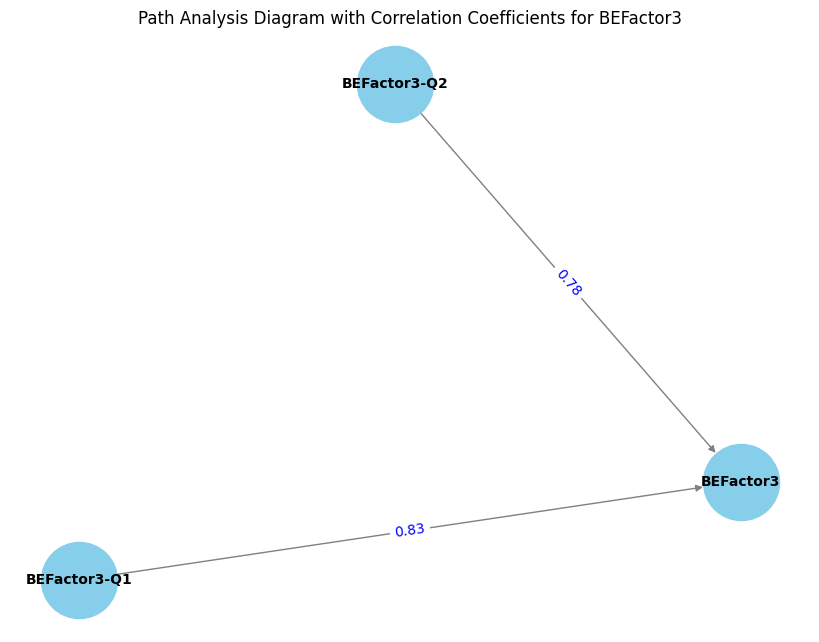

In [ ]:
import pandas as pd
from semopy import Model
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy import stats

# بارگذاری داده‌ها از گوگل درایو
file_path = '/content/drive/My Drive/Brand Engagement.csv'
data = pd.read_csv(file_path)

# حذف داده‌های پرت با استفاده از Z-Score
data = data[(np.abs(stats.zscore(data.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

# ایجاد متغیر BEFactor3 به عنوان میانگین سوالات مربوط به فاکتور
data['BEFactor3'] = data[['BEFactor3-Q1', 'BEFactor3-Q2']].mean(axis=1)

# محاسبه ماتریس همبستگی
correlation_matrix = data[['BEFactor3-Q1', 'BEFactor3-Q2', 'BEFactor3']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# تعریف مدل SEM برای تحلیل مسیر بین سوالات و متغیر BEFactor3
model_desc = """
BEFactor3 ~ BEFactor3-Q1 + BEFactor3-Q2
"""

# ساخت مدل
model = Model(model_desc)

# بارگذاری داده‌ها به مدل
model.load_dataset(data)

# برازش مدل به داده‌ها
model.fit()

# نمایش نتایج
params = model.inspect()
print("Path Analysis Results:")
print(params)

# رسم شکل تحلیل مسیر با استفاده از networkx
def draw_path_diagram(params, corr_matrix):
    G = nx.DiGraph()

    # اضافه کردن گره‌ها و لبه‌ها
    G.add_edges_from([
        ("BEFactor3-Q1", "BEFactor3"),
        ("BEFactor3-Q2", "BEFactor3")
    ])

    # دریافت همبستگی‌ها از ماتریس همبستگی
    corr_labels = {
        ('BEFactor3-Q1', 'BEFactor3'): f"{corr_matrix.loc['BEFactor3-Q1', 'BEFactor3']:.2f}",
        ('BEFactor3-Q2', 'BEFactor3'): f"{corr_matrix.loc['BEFactor3-Q2', 'BEFactor3']:.2f}"
    }

    pos = nx.spring_layout(G)
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')

    # نمایش مقادیر همبستگی روی لبه‌ها
    nx.draw_networkx_edge_labels(G, pos, edge_labels=corr_labels, font_color='blue')

    plt.title("Path Analysis Diagram with Correlation Coefficients for BEFactor3")
    plt.show()

# نمایش شکل تحلیل مسیر
draw_path_diagram(params, correlation_matrix)


Correlation Matrix:
                  BEFactor1  BEFactor2  BEFactor3  Brand_Engagement
BEFactor1          1.000000   0.640217   0.469176          0.849457
BEFactor2          0.640217   1.000000   0.550199          0.866694
BEFactor3          0.469176   0.550199   1.000000          0.797171
Brand_Engagement   0.849457   0.866694   0.797171          1.000000
Path Analysis Results:
               lval  op              rval  Estimate  Std. Err    z-value  \
0  Brand_Engagement   ~         BEFactor1  0.330366  0.009106  36.278756   
1  Brand_Engagement   ~         BEFactor2  0.331513  0.010627  31.194355   
2  Brand_Engagement   ~         BEFactor3  0.330575  0.009102  36.320477   
3  Brand_Engagement  ~~  Brand_Engagement  0.003692  0.000376   9.823441   

   p-value  
0      0.0  
1      0.0  
2      0.0  
3      0.0  


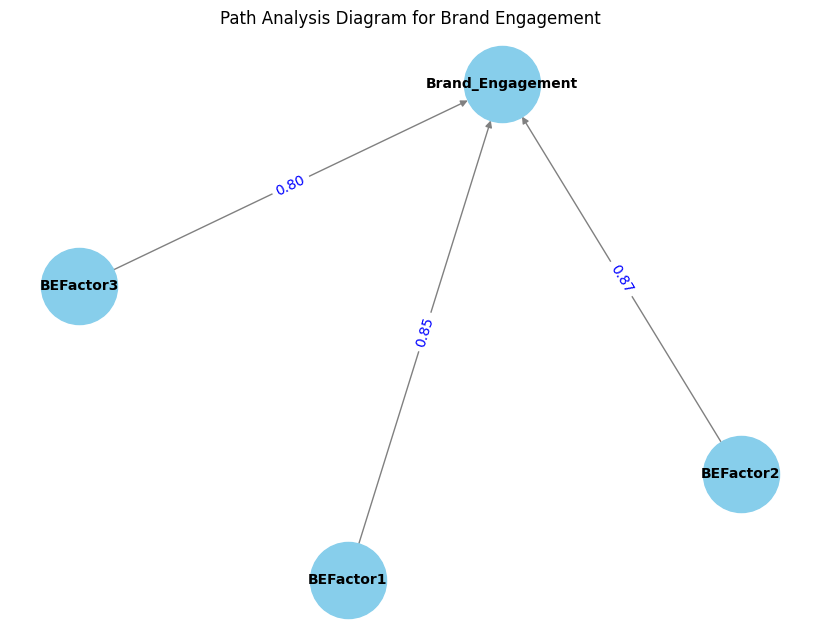

In [ ]:
import pandas as pd
from semopy import Model
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy import stats

# بارگذاری داده‌ها از گوگل درایو
data_path = '/content/drive/My Drive/Brand Engagement.csv'
data = pd.read_csv(data_path)

# حذف داده‌های پرت با استفاده از Z-Score
data = data[(np.abs(stats.zscore(data.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

# ایجاد متغیرهای BEFactor1، BEFactor2 و BEFactor3 به عنوان میانگین سوالات مربوط به هر فاکتور
data['BEFactor1'] = data[['BEFactor1-Q1', 'BEFactor1-Q2']].mean(axis=1)
data['BEFactor2'] = data[['BEFactor2-Q1', 'BEFactor2-Q2']].mean(axis=1)
data['BEFactor3'] = data[['BEFactor3-Q1', 'BEFactor3-Q2']].mean(axis=1)

# ایجاد متغیر Brand_Engagement به عنوان میانگین فاکتورها
data['Brand_Engagement'] = data[['BEFactor1', 'BEFactor2', 'BEFactor3']].mean(axis=1)

# محاسبه ماتریس همبستگی برای Brand_Engagement و فاکتورها
correlation_matrix = data[['BEFactor1', 'BEFactor2', 'BEFactor3', 'Brand_Engagement']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# تعریف مدل SEM برای تحلیل مسیر بین فاکتورها و متغیر Brand_Engagement
model_desc = """
Brand_Engagement ~ BEFactor1 + BEFactor2 + BEFactor3
"""

# ساخت مدل
model = Model(model_desc)

# بارگذاری داده‌ها به مدل
model.load_dataset(data)

# برازش مدل به داده‌ها
model.fit()

# نمایش نتایج
params = model.inspect()
print("Path Analysis Results:")
print(params)

# رسم شکل تحلیل مسیر با استفاده از networkx
def draw_path_diagram(params, corr_matrix):
    G = nx.DiGraph()

    # اضافه کردن گره‌ها و لبه‌ها
    G.add_edges_from([
        ("BEFactor1", "Brand_Engagement"),
        ("BEFactor2", "Brand_Engagement"),
        ("BEFactor3", "Brand_Engagement")
    ])

    # دریافت وزن‌ها از نتایج تحلیل مسیر
    labels = {}
    for index, row in params.iterrows():
        if row['op'] == '~':
            G.add_edge(row['rval'], row['lval'], weight=row['Estimate'])
            labels[(row['rval'], row['lval'])] = f"{row['Estimate']:.2f}"

    # دریافت همبستگی‌ها از ماتریس همبستگی
    corr_labels = {
        ('BEFactor1', 'Brand_Engagement'): f"{correlation_matrix.loc['BEFactor1', 'Brand_Engagement']:.2f}",
        ('BEFactor2', 'Brand_Engagement'): f"{correlation_matrix.loc['BEFactor2', 'Brand_Engagement']:.2f}",
        ('BEFactor3', 'Brand_Engagement'): f"{correlation_matrix.loc['BEFactor3', 'Brand_Engagement']:.2f}"
    }

    pos = nx.spring_layout(G)
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')

    # نمایش مقادیر همبستگی روی لبه‌ها
    nx.draw_networkx_edge_labels(G, pos, edge_labels=corr_labels, font_color='blue')

    plt.title("Path Analysis Diagram for Brand Engagement")
    plt.show()

# نمایش شکل تحلیل مسیر
draw_path_diagram(params, correlation_matrix)


Correlation Matrix:
                  BEFactor1-Q1  BEFactor1-Q2  BEFactor2-Q1  BEFactor2-Q2  \
BEFactor1-Q1          1.000000      0.555061      0.493413      0.371535   
BEFactor1-Q2          0.555061      1.000000      0.651976      0.418240   
BEFactor2-Q1          0.493413      0.651976      1.000000      0.430942   
BEFactor2-Q2          0.371535      0.418240      0.430942      1.000000   
BEFactor3-Q1          0.393840      0.599003      0.543563      0.595334   
BEFactor3-Q2          0.088083      0.227793      0.136161      0.172351   
BEFactor1             0.892696      0.870363      0.645316      0.446534   
BEFactor2             0.508060      0.626560      0.831341      0.859769   
BEFactor3             0.310244      0.527002      0.436763      0.492010   
Brand_Engagement      0.691832      0.811969      0.760239      0.708658   

                  BEFactor3-Q1  BEFactor3-Q2  BEFactor1  BEFactor2  BEFactor3  \
BEFactor1-Q1          0.393840      0.088083   0.892696   0.50

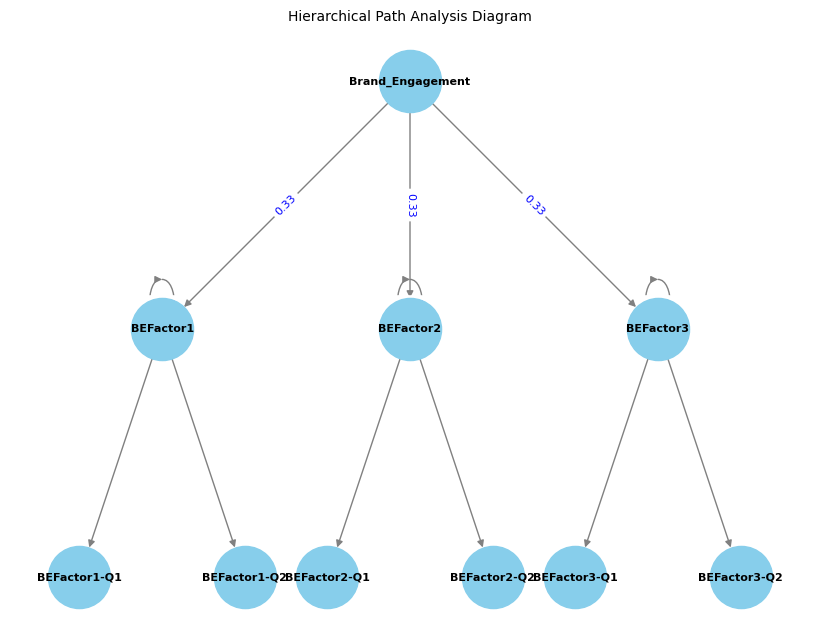

In [ ]:
import pandas as pd
from semopy import Model
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy import stats

# Load data from Google Drive
file_path = '/content/drive/My Drive/Brand Engagement.csv'
data = pd.read_csv(file_path)

# Remove outliers using Z-Score
data = data[(np.abs(stats.zscore(data.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

# Create latent variables as the mean of their related questions
data['BEFactor1'] = data[['BEFactor1-Q1', 'BEFactor1-Q2']].mean(axis=1)
data['BEFactor2'] = data[['BEFactor2-Q1', 'BEFactor2-Q2']].mean(axis=1)
data['BEFactor3'] = data[['BEFactor3-Q1', 'BEFactor3-Q2']].mean(axis=1)

# Create the Brand_Engagement column as the mean or sum of BEFactor1, BEFactor2, and BEFactor3
data['Brand_Engagement'] = data[['BEFactor1', 'BEFactor2', 'BEFactor3']].mean(axis=1)  # or use .sum(axis=1) for sum

# Calculate the correlation matrix
correlation_matrix = data[['BEFactor1-Q1', 'BEFactor1-Q2', 'BEFactor2-Q1', 'BEFactor2-Q2',
                           'BEFactor3-Q1', 'BEFactor3-Q2', 'BEFactor1', 'BEFactor2', 'BEFactor3', 'Brand_Engagement']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Define the SEM model for hierarchical path analysis
model_desc = """
BEFactor1 ~ BEFactor1-Q1 + BEFactor1-Q2
BEFactor2 ~ BEFactor2-Q1 + BEFactor2-Q2
BEFactor3 ~ BEFactor3-Q1 + BEFactor3-Q2
Brand_Engagement ~ BEFactor1 + BEFactor2 + BEFactor3
"""

# Build the model
model = Model(model_desc)

# Load data into the model
model.load_dataset(data)

# Fit the model to the data
model.fit()

# Display the results
params = model.inspect()
print("Path Analysis Results:")
print(params)

# Draw the hierarchical path analysis diagram using networkx
def draw_path_diagram(params, corr_matrix):
    G = nx.DiGraph()

    # Add nodes and edges for the hierarchical path analysis
    G.add_edges_from([
        ("BEFactor1", "BEFactor1-Q1"),
        ("BEFactor1", "BEFactor1-Q2"),
        ("BEFactor2", "BEFactor2-Q1"),
        ("BEFactor2", "BEFactor2-Q2"),
        ("BEFactor3", "BEFactor3-Q1"),
        ("BEFactor3", "BEFactor3-Q2"),
        ("Brand_Engagement", "BEFactor1"),
        ("Brand_Engagement", "BEFactor2"),
        ("Brand_Engagement", "BEFactor3")
    ])

    # Get weights from path analysis results
    labels = {}
    for index, row in params.iterrows():
        if row['op'] == '~':
            G.add_edge(row['lval'], row['rval'], weight=row['Estimate'])
            labels[(row['lval'], row['rval'])] = f"{row['Estimate']:.2f}"

    # Position settings for the nodes
    pos = {
        "Brand_Engagement": (0.5, 0.5),
        "BEFactor1": (0.2, 0.3),
        "BEFactor2": (0.5, 0.3),
        "BEFactor3": (0.8, 0.3),
        "BEFactor1-Q1": (0.1, 0.1),
        "BEFactor1-Q2": (0.3, 0.1),
        "BEFactor2-Q1": (0.4, 0.1),
        "BEFactor2-Q2": (0.6, 0.1),
        "BEFactor3-Q1": (0.7, 0.1),
        "BEFactor3-Q2": (0.9, 0.1)
    }

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=8, font_weight='bold', edge_color='gray')

    # Display correlation values on edges
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='blue', font_size=8)

    plt.title("Hierarchical Path Analysis Diagram", fontsize=10)
    plt.show()

# Show the hierarchical path analysis diagram
draw_path_diagram(params, correlation_matrix)


Correlation Matrix:
                  BEFactor1-Q1  BEFactor1-Q2  BEFactor2-Q1  BEFactor2-Q2  \
BEFactor1-Q1          1.000000      0.555061      0.493413      0.371535   
BEFactor1-Q2          0.555061      1.000000      0.651976      0.418240   
BEFactor2-Q1          0.493413      0.651976      1.000000      0.430942   
BEFactor2-Q2          0.371535      0.418240      0.430942      1.000000   
BEFactor3-Q1          0.393840      0.599003      0.543563      0.595334   
BEFactor3-Q2          0.088083      0.227793      0.136161      0.172351   
BEFactor1             0.892696      0.870363      0.645316      0.446534   
BEFactor2             0.508060      0.626560      0.831341      0.859769   
BEFactor3             0.310244      0.527002      0.436763      0.492010   
Brand_Engagement      0.691832      0.811969      0.760239      0.708658   

                  BEFactor3-Q1  BEFactor3-Q2  BEFactor1  BEFactor2  BEFactor3  \
BEFactor1-Q1          0.393840      0.088083   0.892696   0.50

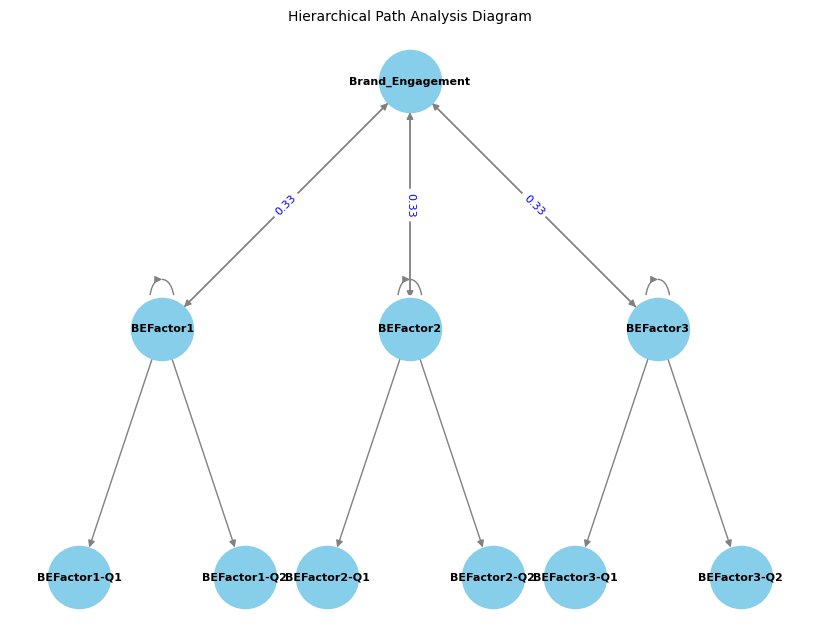

In [ ]:
import pandas as pd
from semopy import Model
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy import stats

# Load data from Google Drive
file_path = '/content/drive/My Drive/Brand Engagement.csv'
data = pd.read_csv(file_path)

# Remove outliers using Z-Score
data = data[(np.abs(stats.zscore(data.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

# Create latent variables as the mean of their related questions
data['BEFactor1'] = data[['BEFactor1-Q1', 'BEFactor1-Q2']].mean(axis=1)
data['BEFactor2'] = data[['BEFactor2-Q1', 'BEFactor2-Q2']].mean(axis=1)
data['BEFactor3'] = data[['BEFactor3-Q1', 'BEFactor3-Q2']].mean(axis=1)

# Create the Brand_Engagement column as the mean or sum of BEFactor1, BEFactor2, and BEFactor3
data['Brand_Engagement'] = data[['BEFactor1', 'BEFactor2', 'BEFactor3']].mean(axis=1)  # or use .sum(axis=1) for sum

# Calculate the correlation matrix
correlation_matrix = data[['BEFactor1-Q1', 'BEFactor1-Q2', 'BEFactor2-Q1', 'BEFactor2-Q2',
                           'BEFactor3-Q1', 'BEFactor3-Q2', 'BEFactor1', 'BEFactor2', 'BEFactor3', 'Brand_Engagement']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Define the SEM model for hierarchical path analysis
model_desc = """
BEFactor1 ~ BEFactor1-Q1 + BEFactor1-Q2
BEFactor2 ~ BEFactor2-Q1 + BEFactor2-Q2
BEFactor3 ~ BEFactor3-Q1 + BEFactor3-Q2
Brand_Engagement ~ BEFactor1 + BEFactor2 + BEFactor3
"""

# Build the model
model = Model(model_desc)

# Load data into the model
model.load_dataset(data)

# Fit the model to the data
model.fit()

# Display the results
params = model.inspect()
print("Path Analysis Results:")
print(params)

# Draw the hierarchical path analysis diagram using networkx
def draw_path_diagram(params, corr_matrix):
    G = nx.DiGraph()

    # Add nodes and edges for the hierarchical path analysis
    G.add_edges_from([
        ("BEFactor1", "BEFactor1-Q1"),
        ("BEFactor1", "BEFactor1-Q2"),
        ("BEFactor2", "BEFactor2-Q1"),
        ("BEFactor2", "BEFactor2-Q2"),
        ("BEFactor3", "BEFactor3-Q1"),
        ("BEFactor3", "BEFactor3-Q2"),
        ("BEFactor1", "Brand_Engagement"),   # Reversed direction
        ("BEFactor2", "Brand_Engagement"),   # Reversed direction
        ("BEFactor3", "Brand_Engagement")    # Reversed direction
    ])

    # Get weights from path analysis results
    labels = {}
    for index, row in params.iterrows():
        if row['op'] == '~':
            G.add_edge(row['lval'], row['rval'], weight=row['Estimate'])
            labels[(row['lval'], row['rval'])] = f"{row['Estimate']:.2f}"

    # Position settings for the nodes
    pos = {
        "Brand_Engagement": (0.5, 0.5),
        "BEFactor1": (0.2, 0.3),
        "BEFactor2": (0.5, 0.3),
        "BEFactor3": (0.8, 0.3),
        "BEFactor1-Q1": (0.1, 0.1),
        "BEFactor1-Q2": (0.3, 0.1),
        "BEFactor2-Q1": (0.4, 0.1),
        "BEFactor2-Q2": (0.6, 0.1),
        "BEFactor3-Q1": (0.7, 0.1),
        "BEFactor3-Q2": (0.9, 0.1)
    }

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=8, font_weight='bold', edge_color='gray')

    # Display correlation values on edges
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='blue', font_size=8)

    plt.title("Hierarchical Path Analysis Diagram", fontsize=10)
    plt.show()

# Show the hierarchical path analysis diagram
draw_path_diagram(params, correlation_matrix)


Correlation Matrix:
                  BEFactor1-Q1  BEFactor1-Q2  BEFactor2-Q1  BEFactor2-Q2  \
BEFactor1-Q1          1.000000      0.555061      0.493413      0.371535   
BEFactor1-Q2          0.555061      1.000000      0.651976      0.418240   
BEFactor2-Q1          0.493413      0.651976      1.000000      0.430942   
BEFactor2-Q2          0.371535      0.418240      0.430942      1.000000   
BEFactor3-Q1          0.393840      0.599003      0.543563      0.595334   
BEFactor3-Q2          0.088083      0.227793      0.136161      0.172351   
BEFactor1             0.892696      0.870363      0.645316      0.446534   
BEFactor2             0.508060      0.626560      0.831341      0.859769   
BEFactor3             0.310244      0.527002      0.436763      0.492010   
Brand_Engagement      0.691832      0.811969      0.760239      0.708658   

                  BEFactor3-Q1  BEFactor3-Q2  BEFactor1  BEFactor2  BEFactor3  \
BEFactor1-Q1          0.393840      0.088083   0.892696   0.50

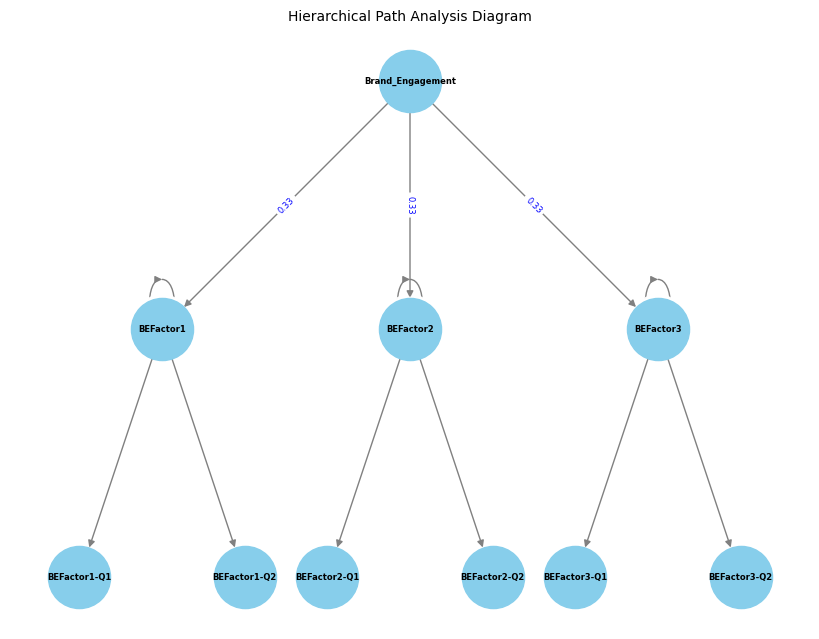

In [ ]:
import pandas as pd
from semopy import Model
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy import stats

# Load data from Google Drive
file_path = '/content/drive/My Drive/Brand Engagement.csv'
data = pd.read_csv(file_path)

# Remove outliers using Z-Score
data = data[(np.abs(stats.zscore(data.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

# Create latent variables as the mean of their related questions
data['BEFactor1'] = data[['BEFactor1-Q1', 'BEFactor1-Q2']].mean(axis=1)
data['BEFactor2'] = data[['BEFactor2-Q1', 'BEFactor2-Q2']].mean(axis=1)
data['BEFactor3'] = data[['BEFactor3-Q1', 'BEFactor3-Q2']].mean(axis=1)

# Create the Brand_Engagement column as the mean or sum of BEFactor1, BEFactor2, and BEFactor3
data['Brand_Engagement'] = data[['BEFactor1', 'BEFactor2', 'BEFactor3']].mean(axis=1)  # or use .sum(axis=1) for sum

# Calculate the correlation matrix
correlation_matrix = data[['BEFactor1-Q1', 'BEFactor1-Q2', 'BEFactor2-Q1', 'BEFactor2-Q2',
                           'BEFactor3-Q1', 'BEFactor3-Q2', 'BEFactor1', 'BEFactor2', 'BEFactor3', 'Brand_Engagement']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Define the SEM model for hierarchical path analysis
model_desc = """
BEFactor1 ~ BEFactor1-Q1 + BEFactor1-Q2
BEFactor2 ~ BEFactor2-Q1 + BEFactor2-Q2
BEFactor3 ~ BEFactor3-Q1 + BEFactor3-Q2
Brand_Engagement ~ BEFactor1 + BEFactor2 + BEFactor3
"""

# Build the model
model = Model(model_desc)

# Load data into the model
model.load_dataset(data)

# Fit the model to the data
model.fit()

# Display the results
params = model.inspect()
print("Path Analysis Results:")
print(params)

# Draw the hierarchical path analysis diagram using networkx
def draw_path_diagram(params, corr_matrix):
    G = nx.DiGraph()

    # Add nodes and edges for the hierarchical path analysis
    G.add_edges_from([
        ("BEFactor1", "BEFactor1-Q1"),
        ("BEFactor1", "BEFactor1-Q2"),
        ("BEFactor2", "BEFactor2-Q1"),
        ("BEFactor2", "BEFactor2-Q2"),
        ("BEFactor3", "BEFactor3-Q1"),
        ("BEFactor3", "BEFactor3-Q2"),
        ("Brand_Engagement", "BEFactor1"),
        ("Brand_Engagement", "BEFactor2"),
        ("Brand_Engagement", "BEFactor3")
    ])

    # Get weights from path analysis results
    labels = {}
    for index, row in params.iterrows():
        if row['op'] == '~':
            G.add_edge(row['lval'], row['rval'], weight=row['Estimate'])
            labels[(row['lval'], row['rval'])] = f"{row['Estimate']:.2f}"

    # Position settings for the nodes
    pos = {
        "Brand_Engagement": (0.5, 0.5),
        "BEFactor1": (0.2, 0.3),
        "BEFactor2": (0.5, 0.3),
        "BEFactor3": (0.8, 0.3),
        "BEFactor1-Q1": (0.1, 0.1),
        "BEFactor1-Q2": (0.3, 0.1),
        "BEFactor2-Q1": (0.4, 0.1),
        "BEFactor2-Q2": (0.6, 0.1),
        "BEFactor3-Q1": (0.7, 0.1),
        "BEFactor3-Q2": (0.9, 0.1)
    }

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=6, font_weight='bold', edge_color='gray')

    # Display correlation values on edges
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='blue', font_size=6)

    plt.title("Hierarchical Path Analysis Diagram", fontsize=10)
    plt.show()

# Show the hierarchical path analysis diagram
draw_path_diagram(params, correlation_matrix)


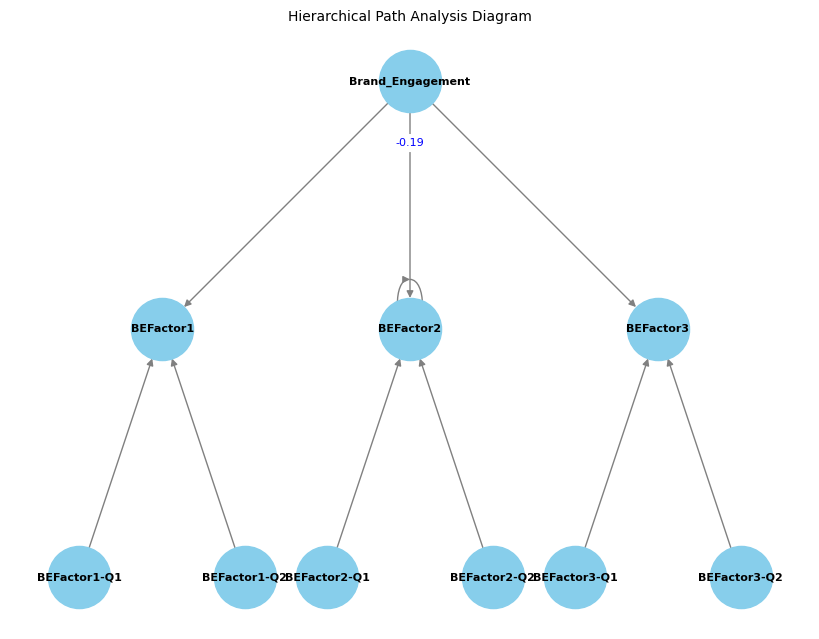

In [ ]:
# Modify the drawing function to change the direction of arrows
def draw_path_diagram(params, corr_matrix):
    G = nx.DiGraph()

    # Add nodes and edges for the hierarchical path analysis with the corrected arrow direction
    G.add_edges_from([
        ("BEFactor1-Q1", "BEFactor1"),
        ("BEFactor1-Q2", "BEFactor1"),
        ("BEFactor2-Q1", "BEFactor2"),
        ("BEFactor2-Q2", "BEFactor2"),
        ("BEFactor3-Q1", "BEFactor3"),
        ("BEFactor3-Q2", "BEFactor3"),
        ("Brand_Engagement", "BEFactor1"),   # Corrected direction
        ("Brand_Engagement", "BEFactor2"),   # Corrected direction
        ("Brand_Engagement", "BEFactor3")    # Corrected direction
    ])

    # Get weights from path analysis results
    labels = {}
    for index, row in params.iterrows():
        if row['op'] == '~':
            G.add_edge(row['lval'], row['rval'], weight=row['Estimate'])
            labels[(row['lval'], row['rval'])] = f"{row['Estimate']:.2f}"

    # Position settings for the nodes
    pos = {
        "Brand_Engagement": (0.5, 0.5),
        "BEFactor1": (0.2, 0.3),
        "BEFactor2": (0.5, 0.3),
        "BEFactor3": (0.8, 0.3),
        "BEFactor1-Q1": (0.1, 0.1),
        "BEFactor1-Q2": (0.3, 0.1),
        "BEFactor2-Q1": (0.4, 0.1),
        "BEFactor2-Q2": (0.6, 0.1),
        "BEFactor3-Q1": (0.7, 0.1),
        "BEFactor3-Q2": (0.9, 0.1)
    }

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=8, font_weight='bold', edge_color='gray')

    # Display correlation values on edges
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='blue', font_size=8)

    plt.title("Hierarchical Path Analysis Diagram", fontsize=10)
    plt.show()

# Show the hierarchical path analysis diagram
draw_path_diagram(params, correlation_matrix)


Correlation Matrix:
                  BEFactor1-Q1  BEFactor1-Q2  BEFactor2-Q1  BEFactor2-Q2  \
BEFactor1-Q1          1.000000      0.555061      0.493413      0.371535   
BEFactor1-Q2          0.555061      1.000000      0.651976      0.418240   
BEFactor2-Q1          0.493413      0.651976      1.000000      0.430942   
BEFactor2-Q2          0.371535      0.418240      0.430942      1.000000   
BEFactor3-Q1          0.393840      0.599003      0.543563      0.595334   
BEFactor3-Q2          0.088083      0.227793      0.136161      0.172351   
BEFactor1             0.892696      0.870363      0.645316      0.446534   
BEFactor2             0.508060      0.626560      0.831341      0.859769   
BEFactor3             0.310244      0.527002      0.436763      0.492010   
Brand_Engagement      0.691832      0.811969      0.760239      0.708658   

                  BEFactor3-Q1  BEFactor3-Q2  BEFactor1  BEFactor2  BEFactor3  \
BEFactor1-Q1          0.393840      0.088083   0.892696   0.50

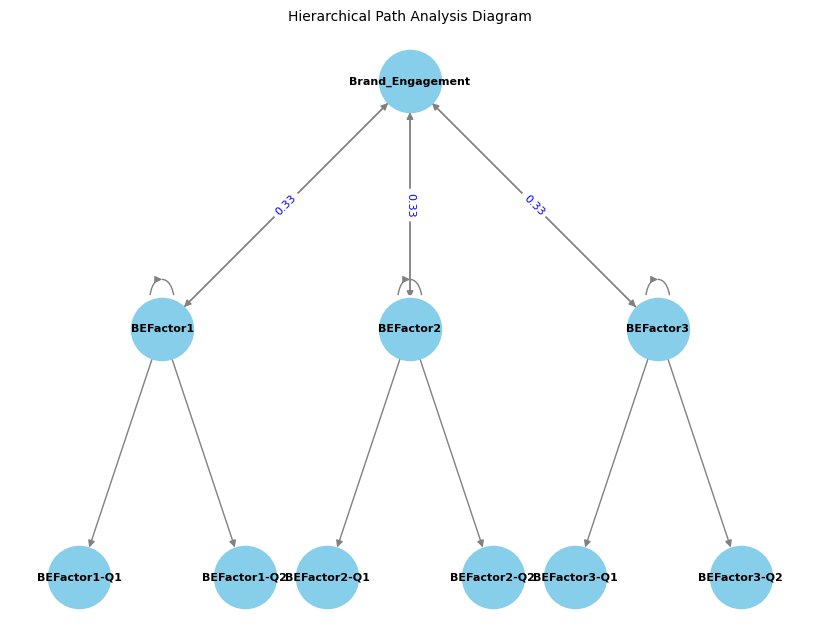

In [ ]:
import pandas as pd
from semopy import Model
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy import stats

# Load data from Google Drive
file_path = '/content/drive/My Drive/Brand Engagement.csv'
data = pd.read_csv(file_path)

# Remove outliers using Z-Score
data = data[(np.abs(stats.zscore(data.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

# Create latent variables as the mean of their related questions
data['BEFactor1'] = data[['BEFactor1-Q1', 'BEFactor1-Q2']].mean(axis=1)
data['BEFactor2'] = data[['BEFactor2-Q1', 'BEFactor2-Q2']].mean(axis=1)
data['BEFactor3'] = data[['BEFactor3-Q1', 'BEFactor3-Q2']].mean(axis=1)

# Create the Brand_Engagement column as the mean or sum of BEFactor1, BEFactor2, and BEFactor3
data['Brand_Engagement'] = data[['BEFactor1', 'BEFactor2', 'BEFactor3']].mean(axis=1)  # or use .sum(axis=1) for sum

# Calculate the correlation matrix
correlation_matrix = data[['BEFactor1-Q1', 'BEFactor1-Q2', 'BEFactor2-Q1', 'BEFactor2-Q2',
                           'BEFactor3-Q1', 'BEFactor3-Q2', 'BEFactor1', 'BEFactor2', 'BEFactor3', 'Brand_Engagement']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Define the SEM model for hierarchical path analysis
model_desc = """
BEFactor1 ~ BEFactor1-Q1 + BEFactor1-Q2
BEFactor2 ~ BEFactor2-Q1 + BEFactor2-Q2
BEFactor3 ~ BEFactor3-Q1 + BEFactor3-Q2
Brand_Engagement ~ BEFactor1 + BEFactor2 + BEFactor3
"""

# Build the model
model = Model(model_desc)

# Load data into the model
model.load_dataset(data)

# Fit the model to the data
model.fit()

# Display the results
params = model.inspect()
print("Path Analysis Results:")
print(params)

# Draw the hierarchical path analysis diagram using networkx
def draw_path_diagram(params, corr_matrix):
    G = nx.DiGraph()

    # Add nodes and edges for the hierarchical path analysis
    G.add_edges_from([
        ("BEFactor1", "BEFactor1-Q1"),
        ("BEFactor1", "BEFactor1-Q2"),
        ("BEFactor2", "BEFactor2-Q1"),
        ("BEFactor2", "BEFactor2-Q2"),
        ("BEFactor3", "BEFactor3-Q1"),
        ("BEFactor3", "BEFactor3-Q2"),
        ("BEFactor1", "Brand_Engagement"),   # Reversed direction
        ("BEFactor2", "Brand_Engagement"),   # Reversed direction
        ("BEFactor3", "Brand_Engagement")    # Reversed direction
    ])

    # Get weights from path analysis results
    labels = {}
    for index, row in params.iterrows():
        if row['op'] == '~':
            G.add_edge(row['lval'], row['rval'], weight=row['Estimate'])
            labels[(row['lval'], row['rval'])] = f"{row['Estimate']:.2f}"

    # Position settings for the nodes
    pos = {
        "Brand_Engagement": (0.5, 0.5),
        "BEFactor1": (0.2, 0.3),
        "BEFactor2": (0.5, 0.3),
        "BEFactor3": (0.8, 0.3),
        "BEFactor1-Q1": (0.1, 0.1),
        "BEFactor1-Q2": (0.3, 0.1),
        "BEFactor2-Q1": (0.4, 0.1),
        "BEFactor2-Q2": (0.6, 0.1),
        "BEFactor3-Q1": (0.7, 0.1),
        "BEFactor3-Q2": (0.9, 0.1)
    }

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=8, font_weight='bold', edge_color='gray')

    # Display correlation values on edges
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='blue', font_size=8)

    plt.title("Hierarchical Path Analysis Diagram", fontsize=10)
    plt.show()

# Show the hierarchical path analysis diagram
draw_path_diagram(params, correlation_matrix)


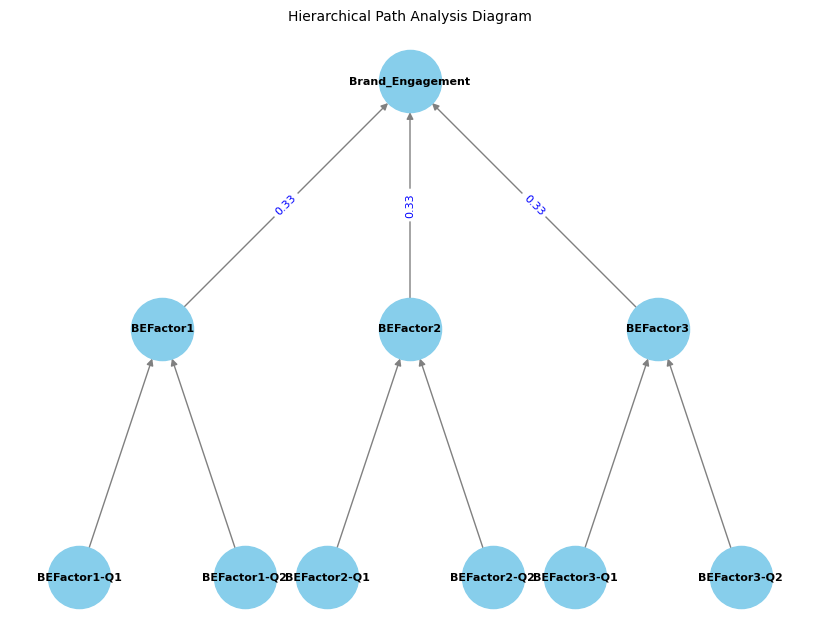

In [ ]:
def draw_path_diagram(params, corr_matrix):
    G = nx.DiGraph()

    # Add nodes and edges for the hierarchical path analysis with the corrected arrow direction
    G.add_edges_from([
        ("BEFactor1-Q1", "BEFactor1"),
        ("BEFactor1-Q2", "BEFactor1"),
        ("BEFactor2-Q1", "BEFactor2"),
        ("BEFactor2-Q2", "BEFactor2"),
        ("BEFactor3-Q1", "BEFactor3"),
        ("BEFactor3-Q2", "BEFactor3"),
        ("BEFactor1", "Brand_Engagement"),   # Corrected single direction
        ("BEFactor2", "Brand_Engagement"),   # Corrected single direction
        ("BEFactor3", "Brand_Engagement")    # Corrected single direction
    ])

    # Get weights from path analysis results
    labels = {}
    for index, row in params.iterrows():
        if row['op'] == '~':
            if (row['rval'], row['lval']) in G.edges:  # Ensure the edge exists in the correct direction
                labels[(row['rval'], row['lval'])] = f"{row['Estimate']:.2f}"

    # Position settings for the nodes
    pos = {
        "Brand_Engagement": (0.5, 0.5),
        "BEFactor1": (0.2, 0.3),
        "BEFactor2": (0.5, 0.3),
        "BEFactor3": (0.8, 0.3),
        "BEFactor1-Q1": (0.1, 0.1),
        "BEFactor1-Q2": (0.3, 0.1),
        "BEFactor2-Q1": (0.4, 0.1),
        "BEFactor2-Q2": (0.6, 0.1),
        "BEFactor3-Q1": (0.7, 0.1),
        "BEFactor3-Q2": (0.9, 0.1)
    }

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=8, font_weight='bold', edge_color='gray')

    # Display correlation values on edges
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='blue', font_size=8)

    plt.title("Hierarchical Path Analysis Diagram", fontsize=10)
    plt.show()

# Show the hierarchical path analysis diagram
draw_path_diagram(params, correlation_matrix)


Correlation Matrix:
                  BEFactor1-Q1  BEFactor1-Q2  BEFactor2-Q1  BEFactor2-Q2  \
BEFactor1-Q1          1.000000      0.555061      0.493413      0.371535   
BEFactor1-Q2          0.555061      1.000000      0.651976      0.418240   
BEFactor2-Q1          0.493413      0.651976      1.000000      0.430942   
BEFactor2-Q2          0.371535      0.418240      0.430942      1.000000   
BEFactor3-Q1          0.393840      0.599003      0.543563      0.595334   
BEFactor3-Q2          0.088083      0.227793      0.136161      0.172351   
BEFactor1             0.892696      0.870363      0.645316      0.446534   
BEFactor2             0.508060      0.626560      0.831341      0.859769   
BEFactor3             0.310244      0.527002      0.436763      0.492010   
Brand_Engagement      0.691832      0.811969      0.760239      0.708658   

                  BEFactor3-Q1  BEFactor3-Q2  BEFactor1  BEFactor2  BEFactor3  \
BEFactor1-Q1          0.393840      0.088083   0.892696   0.50

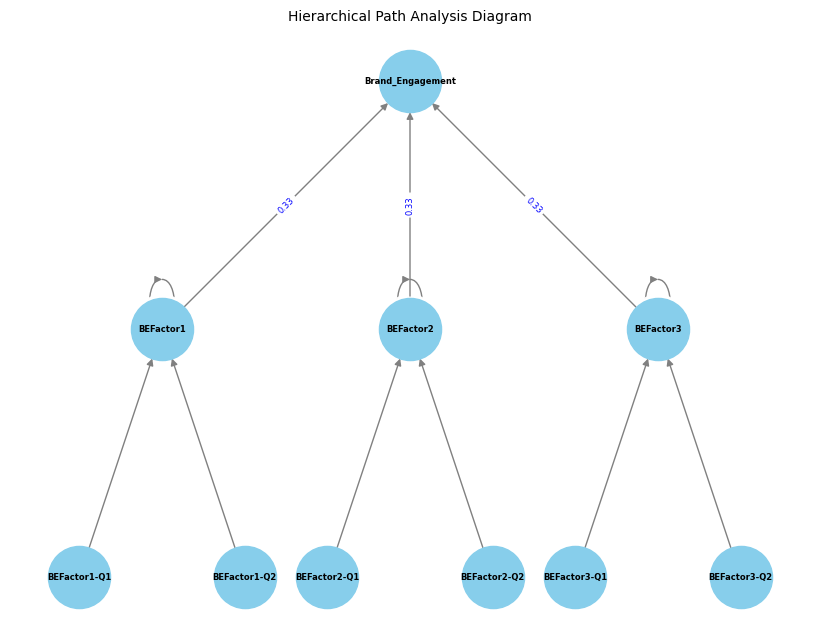

In [ ]:
import pandas as pd
from semopy import Model
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy import stats

# Load data from Google Drive
file_path = '/content/drive/My Drive/Brand Engagement.csv'
data = pd.read_csv(file_path)

# Remove outliers using Z-Score
data = data[(np.abs(stats.zscore(data.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

# Create latent variables as the mean of their related questions
data['BEFactor1'] = data[['BEFactor1-Q1', 'BEFactor1-Q2']].mean(axis=1)
data['BEFactor2'] = data[['BEFactor2-Q1', 'BEFactor2-Q2']].mean(axis=1)
data['BEFactor3'] = data[['BEFactor3-Q1', 'BEFactor3-Q2']].mean(axis=1)

# Create the Brand_Engagement column as the mean or sum of BEFactor1, BEFactor2, and BEFactor3
data['Brand_Engagement'] = data[['BEFactor1', 'BEFactor2', 'BEFactor3']].mean(axis=1)  # or use .sum(axis=1) for sum

# Calculate the correlation matrix
correlation_matrix = data[['BEFactor1-Q1', 'BEFactor1-Q2', 'BEFactor2-Q1', 'BEFactor2-Q2',
                           'BEFactor3-Q1', 'BEFactor3-Q2', 'BEFactor1', 'BEFactor2', 'BEFactor3', 'Brand_Engagement']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Define the SEM model for hierarchical path analysis
model_desc = """
BEFactor1 ~ BEFactor1-Q1 + BEFactor1-Q2
BEFactor2 ~ BEFactor2-Q1 + BEFactor2-Q2
BEFactor3 ~ BEFactor3-Q1 + BEFactor3-Q2
Brand_Engagement ~ BEFactor1 + BEFactor2 + BEFactor3
"""

# Build the model
model = Model(model_desc)

# Load data into the model
model.load_dataset(data)

# Fit the model to the data
model.fit()

# Display the results
params = model.inspect()
print("Path Analysis Results:")
print(params)

# Draw the hierarchical path analysis diagram using networkx
def draw_path_diagram(params, corr_matrix):
    G = nx.DiGraph()

    # Add nodes and edges for the hierarchical path analysis
    G.add_edges_from([
        ("BEFactor1-Q1", "BEFactor1"),
        ("BEFactor1-Q2", "BEFactor1"),
        ("BEFactor2-Q1", "BEFactor2"),
        ("BEFactor2-Q2", "BEFactor2"),
        ("BEFactor3-Q1", "BEFactor3"),
        ("BEFactor3-Q2", "BEFactor3"),
        ("BEFactor1", "Brand_Engagement"),
        ("BEFactor2", "Brand_Engagement"),
        ("BEFactor3", "Brand_Engagement")
    ])

    # Get weights from path analysis results
    labels = {}
    for index, row in params.iterrows():
        if row['op'] == '~':
            G.add_edge(row['rval'], row['lval'], weight=row['Estimate'])
            labels[(row['rval'], row['lval'])] = f"{row['Estimate']:.2f}"

    # Position settings for the nodes
    pos = {
        "Brand_Engagement": (0.5, 0.5),
        "BEFactor1": (0.2, 0.3),
        "BEFactor2": (0.5, 0.3),
        "BEFactor3": (0.8, 0.3),
        "BEFactor1-Q1": (0.1, 0.1),
        "BEFactor1-Q2": (0.3, 0.1),
        "BEFactor2-Q1": (0.4, 0.1),
        "BEFactor2-Q2": (0.6, 0.1),
        "BEFactor3-Q1": (0.7, 0.1),
        "BEFactor3-Q2": (0.9, 0.1)
    }

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=6, font_weight='bold', edge_color='gray')

    # Display correlation values on edges
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='blue', font_size=6)

    plt.title("Hierarchical Path Analysis Diagram", fontsize=10)
    plt.show()

# Show the hierarchical path analysis diagram
draw_path_diagram(params, correlation_matrix)


Correlation Matrix:
                  BEFactor1-Q1  BEFactor1-Q2  BEFactor2-Q1  BEFactor2-Q2  \
BEFactor1-Q1          1.000000      0.555061      0.493413      0.371535   
BEFactor1-Q2          0.555061      1.000000      0.651976      0.418240   
BEFactor2-Q1          0.493413      0.651976      1.000000      0.430942   
BEFactor2-Q2          0.371535      0.418240      0.430942      1.000000   
BEFactor3-Q1          0.393840      0.599003      0.543563      0.595334   
BEFactor3-Q2          0.088083      0.227793      0.136161      0.172351   
BEFactor1             0.892696      0.870363      0.645316      0.446534   
BEFactor2             0.508060      0.626560      0.831341      0.859769   
BEFactor3             0.310244      0.527002      0.436763      0.492010   
Brand_Engagement      0.691832      0.811969      0.760239      0.708658   

                  BEFactor3-Q1  BEFactor3-Q2  BEFactor1  BEFactor2  BEFactor3  \
BEFactor1-Q1          0.393840      0.088083   0.892696   0.50

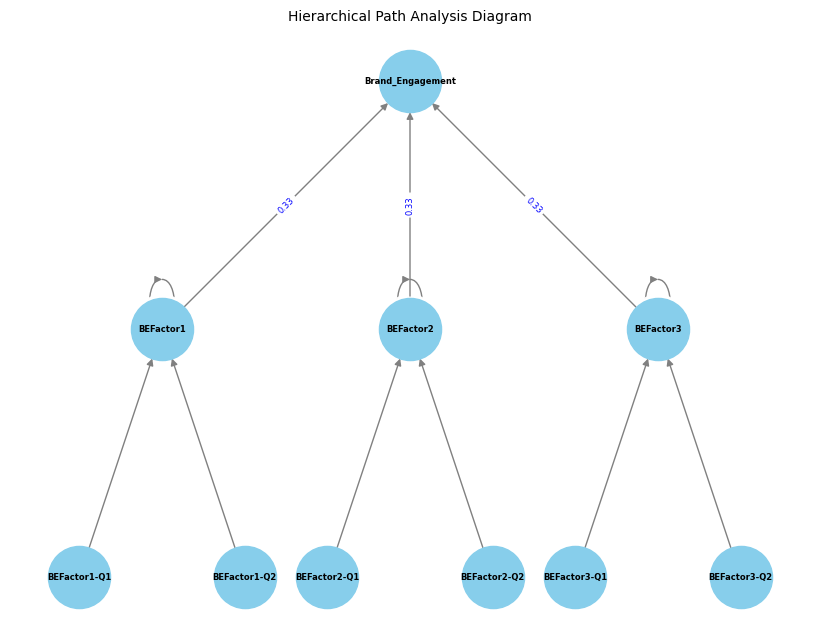

In [ ]:
import pandas as pd
from semopy import Model
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy import stats

# Load data from Google Drive
file_path = '/content/drive/My Drive/Brand Engagement.csv'
data = pd.read_csv(file_path)

# Remove outliers using Z-Score
data = data[(np.abs(stats.zscore(data.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

# Create latent variables as the mean of their related questions
data['BEFactor1'] = data[['BEFactor1-Q1', 'BEFactor1-Q2']].mean(axis=1)
data['BEFactor2'] = data[['BEFactor2-Q1', 'BEFactor2-Q2']].mean(axis=1)
data['BEFactor3'] = data[['BEFactor3-Q1', 'BEFactor3-Q2']].mean(axis=1)

# Create the Brand_Engagement column as the mean or sum of BEFactor1, BEFactor2, and BEFactor3
data['Brand_Engagement'] = data[['BEFactor1', 'BEFactor2', 'BEFactor3']].mean(axis=1)  # or use .sum(axis=1) for sum

# Calculate the correlation matrix
correlation_matrix = data[['BEFactor1-Q1', 'BEFactor1-Q2', 'BEFactor2-Q1', 'BEFactor2-Q2',
                           'BEFactor3-Q1', 'BEFactor3-Q2', 'BEFactor1', 'BEFactor2', 'BEFactor3', 'Brand_Engagement']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Define the SEM model for hierarchical path analysis
model_desc = """
BEFactor1 ~ BEFactor1-Q1 + BEFactor1-Q2
BEFactor2 ~ BEFactor2-Q1 + BEFactor2-Q2
BEFactor3 ~ BEFactor3-Q1 + BEFactor3-Q2
Brand_Engagement ~ BEFactor1 + BEFactor2 + BEFactor3
"""

# Build the model
model = Model(model_desc)

# Load data into the model
model.load_dataset(data)

# Fit the model to the data
model.fit()

# Display the results
params = model.inspect()
print("Path Analysis Results:")
print(params)

# Draw the hierarchical path analysis diagram using networkx
def draw_path_diagram(params, corr_matrix):
    G = nx.DiGraph()

    # Add nodes and edges for the hierarchical path analysis
    G.add_edges_from([
        ("BEFactor1-Q1", "BEFactor1"),
        ("BEFactor1-Q2", "BEFactor1"),
        ("BEFactor2-Q1", "BEFactor2"),
        ("BEFactor2-Q2", "BEFactor2"),
        ("BEFactor3-Q1", "BEFactor3"),
        ("BEFactor3-Q2", "BEFactor3"),
        ("BEFactor1", "Brand_Engagement"),
        ("BEFactor2", "Brand_Engagement"),
        ("BEFactor3", "Brand_Engagement")
    ])

    # Get weights from path analysis results
    labels = {}
    for index, row in params.iterrows():
        if row['op'] == '~':
            if row['lval'] == "Brand_Engagement":
                # Reverse the direction for edges between Brand_Engagement and BEFactors
                G.add_edge(row['rval'], row['lval'], weight=row['Estimate'])
                labels[(row['rval'], row['lval'])] = f"{row['Estimate']:.2f}"
            else:
                G.add_edge(row['lval'], row['rval'], weight=row['Estimate'])
                labels[(row['lval'], row['rval'])] = f"{row['Estimate']:.2f}"

    # Position settings for the nodes
    pos = {
        "Brand_Engagement": (0.5, 0.5),
        "BEFactor1": (0.2, 0.3),
        "BEFactor2": (0.5, 0.3),
        "BEFactor3": (0.8, 0.3),
        "BEFactor1-Q1": (0.1, 0.1),
        "BEFactor1-Q2": (0.3, 0.1),
        "BEFactor2-Q1": (0.4, 0.1),
        "BEFactor2-Q2": (0.6, 0.1),
        "BEFactor3-Q1": (0.7, 0.1),
        "BEFactor3-Q2": (0.9, 0.1)
    }

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=6, font_weight='bold', edge_color='gray')

    # Display correlation values on edges
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='blue', font_size=6)

    plt.title("Hierarchical Path Analysis Diagram", fontsize=10)
    plt.show()

# Show the hierarchical path analysis diagram
draw_path_diagram(params, correlation_matrix)


Mean Squared Error (MSE): 0.0025
R-squared (R2): 0.9887


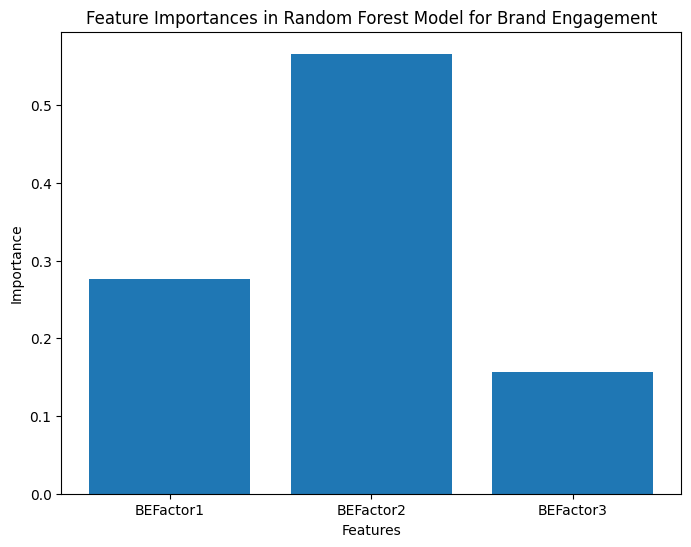

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# بارگذاری داده‌ها از گوگل درایو
data_path = '/content/drive/My Drive/Brand Engagement.csv'
data = pd.read_csv(data_path)

# حذف داده‌های پرت با استفاده از Z-Score
data = data[(np.abs(stats.zscore(data.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

# ایجاد متغیرهای BEFactor1، BEFactor2 و BEFactor3 به عنوان میانگین سوالات مربوط به هر فاکتور
data['BEFactor1'] = data[['BEFactor1-Q1', 'BEFactor1-Q2']].mean(axis=1)
data['BEFactor2'] = data[['BEFactor2-Q1', 'BEFactor2-Q2']].mean(axis=1)
data['BEFactor3'] = data[['BEFactor3-Q1', 'BEFactor3-Q2']].mean(axis=1)

# ایجاد متغیر Brand_Engagement به عنوان میانگین فاکتورها
data['Brand_Engagement'] = data[['BEFactor1', 'BEFactor2', 'BEFactor3']].mean(axis=1)

# جدا کردن ویژگی‌ها و هدف
X = data[['BEFactor1', 'BEFactor2', 'BEFactor3']]
y = data['Brand_Engagement']

# تقسیم داده‌ها به مجموعه‌های آموزشی و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ساخت مدل جنگل تصادفی
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# پیش‌بینی با مدل جنگل تصادفی
y_pred = rf_model.predict(X_test)

# ارزیابی مدل
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.4f}")
print(f"R-squared (R2): {r2_score(y_test, y_pred):.4f}")

# نمایش اهمیت ویژگی‌ها
importances = rf_model.feature_importances_
plt.figure(figsize=(8, 6))
plt.bar(X.columns, importances)
plt.title("Feature Importances in Random Forest Model for Brand Engagement")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# بارگذاری داده‌ها از گوگل درایو
data_path = '/content/drive/My Drive/Gamification2.csv'
data = pd.read_csv(data_path)

# حذف داده‌های پرت با استفاده از Z-Score
from scipy import stats
data = data[(np.abs(stats.zscore(data.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

# جدا کردن ویژگی‌ها (تمام سوالات) و هدف (Gamification)
questions = ['GFactor1-Q1', 'GFactor1-Q2', 'GFactor1-Q3', 'GFactor2-Q1', 'GFactor2-Q2', 'GFactor2-Q3',
             'GFactor3-Q1', 'GFactor3-Q2', 'GFactor3-Q3']
X = data[questions]
data['Gamification'] = data[questions].mean(axis=1)
y = data['Gamification']

# تقسیم داده‌ها به مجموعه‌های آموزشی و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ساخت مدل جنگل تصادفی
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# پیش‌بینی با مدل جنگل تصادفی
y_pred = rf_model.predict(X_test)

# ارزیابی مدل
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)
importances_rf = rf_model.feature_importances_

# ایجاد جدول نتایج
results_rf = pd.DataFrame({'Feature': questions, 'Importance': importances_rf})
results_rf = results_rf.sort_values(by='Importance', ascending=False)

# اضافه کردن R² و MSE به انتهای جدول
overall_rf = pd.DataFrame({'Feature': ['Overall'], 'Importance': ['N/A'], 'R-squared': [r2_rf], 'MSE': [mse_rf]})
results_rf = pd.concat([results_rf, overall_rf], ignore_index=True)

print("Random Forest Results:")
print(results_rf)

Random Forest Results:
       Feature Importance  R-squared       MSE
0  GFactor1-Q2   0.582053        NaN       NaN
1  GFactor1-Q3   0.103458        NaN       NaN
2  GFactor3-Q1   0.098969        NaN       NaN
3  GFactor3-Q3   0.053534        NaN       NaN
4  GFactor2-Q1   0.045066        NaN       NaN
5  GFactor3-Q2   0.040084        NaN       NaN
6  GFactor2-Q3   0.032622        NaN       NaN
7  GFactor2-Q2   0.022658        NaN       NaN
8  GFactor1-Q1   0.021556        NaN       NaN
9      Overall        N/A    0.95623  0.007534


Mean Squared Error (MSE): 0.0000
R-squared (R2): 1.0000


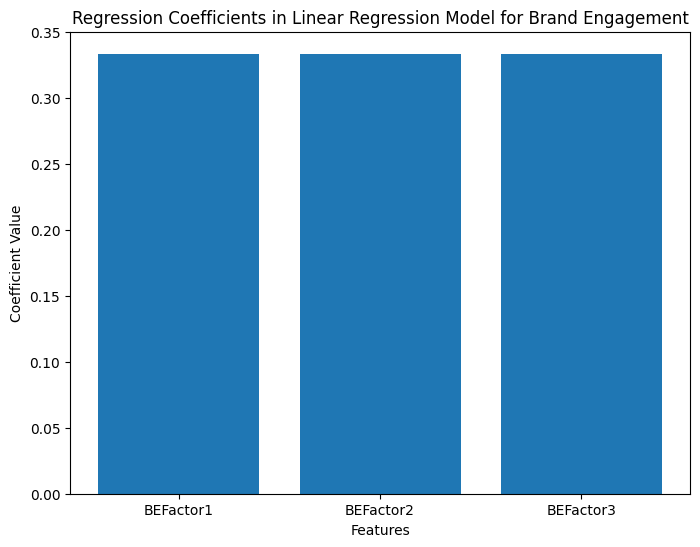

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# بارگذاری داده‌ها از گوگل درایو
data_path = '/content/drive/My Drive/Brand Engagement.csv'
data = pd.read_csv(data_path)

# حذف داده‌های پرت با استفاده از Z-Score
from scipy import stats
data = data[(np.abs(stats.zscore(data.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

# ایجاد متغیرهای BEFactor1، BEFactor2 و BEFactor3 به عنوان میانگین سوالات مربوط به هر فاکتور
data['BEFactor1'] = data[['BEFactor1-Q1', 'BEFactor1-Q2']].mean(axis=1)
data['BEFactor2'] = data[['BEFactor2-Q1', 'BEFactor2-Q2']].mean(axis=1)
data['BEFactor3'] = data[['BEFactor3-Q1', 'BEFactor3-Q2']].mean(axis=1)

# ایجاد متغیر Brand_Engagement به عنوان میانگین فاکتورها
data['Brand_Engagement'] = data[['BEFactor1', 'BEFactor2', 'BEFactor3']].mean(axis=1)

# جدا کردن ویژگی‌ها و هدف
X = data[['BEFactor1', 'BEFactor2', 'BEFactor3']]
y = data['Brand_Engagement']

# تقسیم داده‌ها به مجموعه‌های آموزشی و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ساخت مدل رگرسیون خطی
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# پیش‌بینی با مدل رگرسیون خطی
y_pred = lr_model.predict(X_test)

# ارزیابی مدل
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.4f}")
print(f"R-squared (R2): {r2_score(y_test, y_pred):.4f}")

# نمایش ضرایب رگرسیون
coefficients = lr_model.coef_
plt.figure(figsize=(8, 6))
plt.bar(X.columns, coefficients)
plt.title("Regression Coefficients in Linear Regression Model for Brand Engagement")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.show()


Mean Squared Error (MSE): 0.0111
R-squared (R2): 0.9504


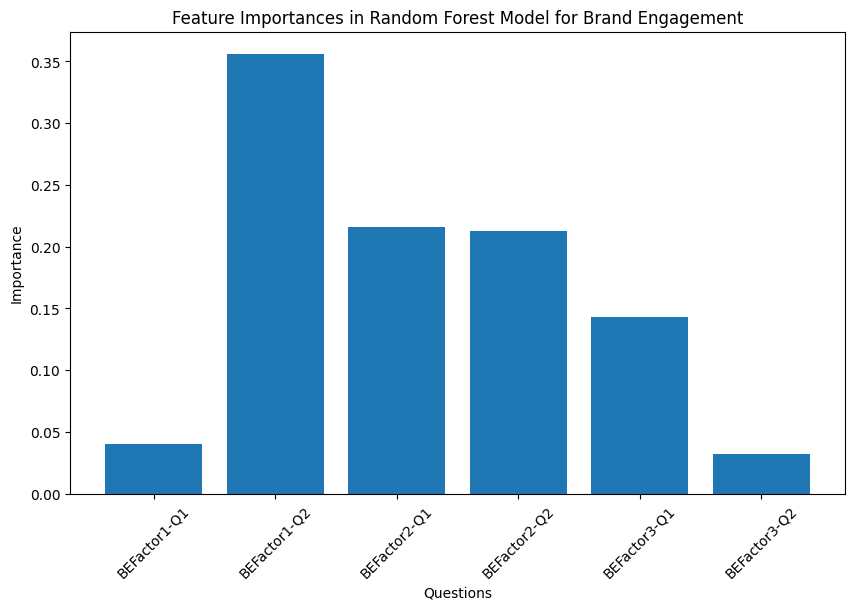

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from scipy import stats

# بارگذاری داده‌ها از گوگل درایو
data_path = '/content/drive/My Drive/Brand Engagement.csv'
data = pd.read_csv(data_path)

# حذف داده‌های پرت با استفاده از Z-Score
data = data[(np.abs(stats.zscore(data.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

# جدا کردن ویژگی‌ها (تمام سوالات) و هدف (Brand Engagement)
questions = ['BEFactor1-Q1', 'BEFactor1-Q2', 'BEFactor2-Q1', 'BEFactor2-Q2', 'BEFactor3-Q1', 'BEFactor3-Q2']
X = data[questions]

# فرض بر این است که Brand Engagement میانگین همه سوالات مربوط به هر فاکتور است
data['Brand_Engagement'] = data[questions].mean(axis=1)
y = data['Brand_Engagement']

# تقسیم داده‌ها به مجموعه‌های آموزشی و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ساخت مدل جنگل تصادفی
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# پیش‌بینی با مدل جنگل تصادفی
y_pred = rf_model.predict(X_test)

# ارزیابی مدل
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.4f}")
print(f"R-squared (R2): {r2_score(y_test, y_pred):.4f}")

# نمایش اهمیت ویژگی‌ها (هر سوال)
importances = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(questions, importances)
plt.title("Feature Importances in Random Forest Model for Brand Engagement")
plt.xticks(rotation=45)
plt.xlabel("Questions")
plt.ylabel("Importance")
plt.show()


Mean Squared Error (MSE): 0.0022
R-squared (R2): 0.9900


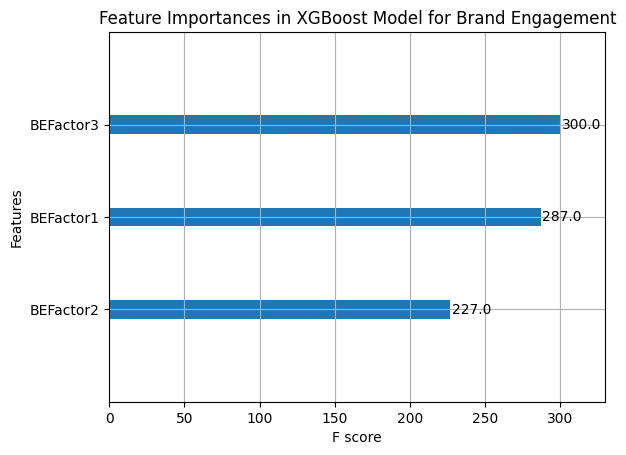

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# بارگذاری داده‌ها از گوگل درایو
data_path = '/content/drive/My Drive/Brand Engagement.csv'
data = pd.read_csv(data_path)

# حذف داده‌های پرت با استفاده از Z-Score
from scipy import stats
data = data[(np.abs(stats.zscore(data.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

# ایجاد متغیرهای BEFactor1، BEFactor2 و BEFactor3 به عنوان میانگین سوالات مربوط به هر فاکتور
data['BEFactor1'] = data[['BEFactor1-Q1', 'BEFactor1-Q2']].mean(axis=1)
data['BEFactor2'] = data[['BEFactor2-Q1', 'BEFactor2-Q2']].mean(axis=1)
data['BEFactor3'] = data[['BEFactor3-Q1', 'BEFactor3-Q2']].mean(axis=1)

# ایجاد متغیر Brand_Engagement به عنوان میانگین فاکتورها
data['Brand_Engagement'] = data[['BEFactor1', 'BEFactor2', 'BEFactor3']].mean(axis=1)

# جدا کردن ویژگی‌ها و هدف
X = data[['BEFactor1', 'BEFactor2', 'BEFactor3']]
y = data['Brand_Engagement']

# تقسیم داده‌ها به مجموعه‌های آموزشی و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ساخت مدل XGBoost
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgboost_model.fit(X_train, y_train)

# پیش‌بینی با مدل XGBoost
y_pred = xgboost_model.predict(X_test)

# ارزیابی مدل
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.4f}")
print(f"R-squared (R2): {r2_score(y_test, y_pred):.4f}")

# نمایش اهمیت ویژگی‌ها
xgb.plot_importance(xgboost_model)
plt.title("Feature Importances in XGBoost Model for Brand Engagement")
plt.show()


In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# بارگذاری داده‌ها از گوگل درایو
data_path = '/content/drive/My Drive/Brand Engagement.csv'
data = pd.read_csv(data_path)

# حذف داده‌های پرت با استفاده از Z-Score
from scipy import stats
data = data[(np.abs(stats.zscore(data.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

# انتخاب ویژگی‌ها (تمام سوالات) و هدف (Brand Engagement)
questions = ['BEFactor1-Q1', 'BEFactor1-Q2', 'BEFactor2-Q1', 'BEFactor2-Q2', 'BEFactor3-Q1', 'BEFactor3-Q2']
X = data[questions]

# ایجاد متغیر هدف Brand_Engagement به عنوان میانگین سوالات
data['Brand_Engagement'] = data[questions].mean(axis=1)
y = data['Brand_Engagement']

# تقسیم داده‌ها به مجموعه‌های آموزشی و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ساخت مدل XGBoost
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgboost_model.fit(X_train, y_train)

# پیش‌بینی با مدل XGBoost
y_pred = xgboost_model.predict(X_test)

# ارزیابی مدل
mse_xgb = mean_squared_error(y_test, y_pred)
r2_xgb = r2_score(y_test, y_pred)
importances_xgb = xgboost_model.feature_importances_

# ایجاد جدول نتایج
results_xgb = pd.DataFrame({'Feature': questions, 'Importance': importances_xgb})
results_xgb = results_xgb.sort_values(by='Importance', ascending=False)

# اضافه کردن R² و MSE به انتهای جدول
overall_xgb = pd.DataFrame({'Feature': ['Overall'], 'Importance': ['N/A'], 'R-squared': [r2_xgb], 'MSE': [mse_xgb]})
results_xgb = pd.concat([results_xgb, overall_xgb], ignore_index=True)

print("XGBoost Results:")
print(results_xgb)


XGBoost Results:
        Feature Importance  R-squared       MSE
0  BEFactor2-Q1   0.545803        NaN       NaN
1  BEFactor1-Q2   0.177807        NaN       NaN
2  BEFactor2-Q2   0.131353        NaN       NaN
3  BEFactor3-Q1   0.096003        NaN       NaN
4  BEFactor1-Q1   0.026423        NaN       NaN
5  BEFactor3-Q2   0.022611        NaN       NaN
6       Overall        N/A   0.976665  0.005235


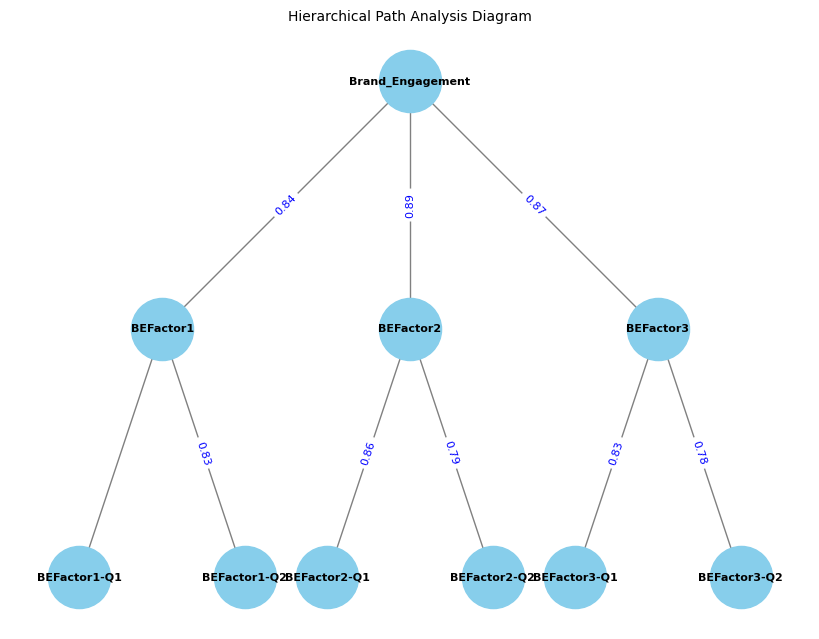

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# تعریف داده‌های نمونه برای params
params = pd.DataFrame({
    'op': ['~', '~', '~', '~', '~', '~', '~', '~', '~'],
    'lval': ['Brand_Engagement', 'Brand_Engagement', 'Brand_Engagement',
             'KHAR', 'BEFactor1', 'BEFactor2',
             'BEFactor2', 'BEFactor3', 'BEFactor3'],
    'rval': ['KHAR', 'BEFactor2', 'BEFactor3',
             'KHAR-Q1', 'BEFactor1-Q2',
             'BEFactor2-Q1', 'BEFactor2-Q2',
             'BEFactor3-Q1', 'BEFactor3-Q2'],
    'Estimate': [0.84, 0.89, 0.87, 0.86, 0.83, 0.86, 0.79, 0.83, 0.78]
})

# تعریف داده‌های نمونه برای correlation_matrix
correlation_matrix = pd.DataFrame({
    'BEFactor1': [1, 0.3, 0.4],
    'BEFactor2': [0.3, 1, 0.5],
    'BEFactor3': [0.4, 0.5, 1]
}, index=['BEFactor1', 'BEFactor2', 'BEFactor3'])

# تابع برای رسم نمودار
def draw_path_diagram(params, corr_matrix):
    G = nx.Graph()  # استفاده از گراف بدون جهت

    # Add nodes and edges for the hierarchical path analysis with lines
    G.add_edges_from([
        ("BEFactor1-Q1", "BEFactor1"),
        ("BEFactor1-Q2", "BEFactor1"),
        ("BEFactor2-Q1", "BEFactor2"),
        ("BEFactor2-Q2", "BEFactor2"),
        ("BEFactor3-Q1", "BEFactor3"),
        ("BEFactor3-Q2", "BEFactor3"),
        ("BEFactor1", "Brand_Engagement"),
        ("BEFactor2", "Brand_Engagement"),
        ("BEFactor3", "Brand_Engagement")
    ])

    # Get weights from path analysis results
    labels = {}
    for index, row in params.iterrows():
        if row['op'] == '~':
            if (row['rval'], row['lval']) in G.edges:  # Ensure the edge exists in the correct direction
                labels[(row['rval'], row['lval'])] = f"{row['Estimate']:.2f}"

    # Position settings for the nodes
    pos = {
        "Brand_Engagement": (0.5, 0.5),
        "BEFactor1": (0.2, 0.3),
        "BEFactor2": (0.5, 0.3),
        "BEFactor3": (0.8, 0.3),
        "BEFactor1-Q1": (0.1, 0.1),
        "BEFactor1-Q2": (0.3, 0.1),
        "BEFactor2-Q1": (0.4, 0.1),
        "BEFactor2-Q2": (0.6, 0.1),
        "BEFactor3-Q1": (0.7, 0.1),
        "BEFactor3-Q2": (0.9, 0.1)
    }

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=8, font_weight='bold', edge_color='gray')

    # Display correlation values on edges
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='blue', font_size=8)

    plt.title("Hierarchical Path Analysis Diagram", fontsize=10)
    plt.show()

# Show the hierarchical path analysis diagram
draw_path_diagram(params, correlation_matrix)


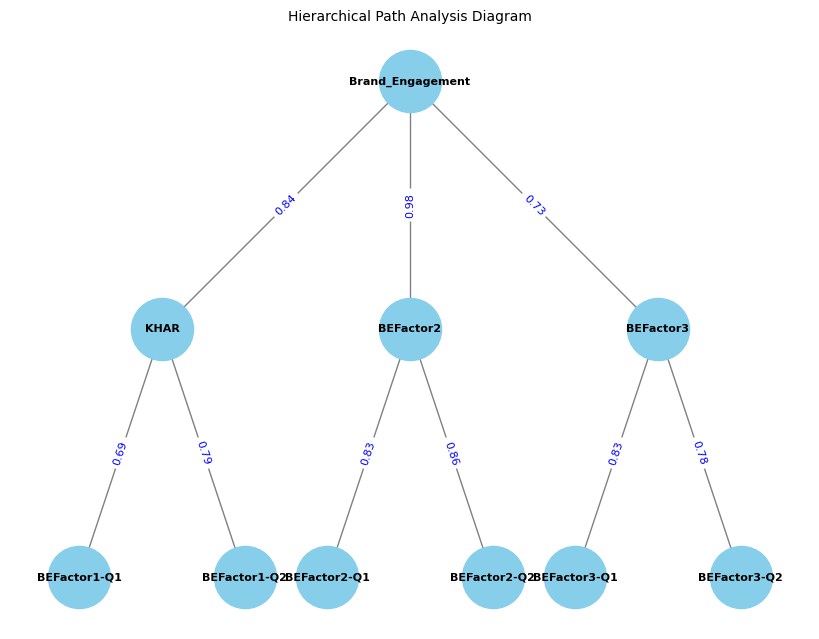

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# تعریف داده‌های نمونه برای params
params = pd.DataFrame({
    'op': ['~', '~', '~', '~', '~', '~', '~', '~', '~'],
    'lval': ['Brand_Engagement', 'Brand_Engagement', 'Brand_Engagement',
             'KHAR', 'KHAR', 'BEFactor2',
             'BEFactor2', 'BEFactor3', 'BEFactor3'],
    'rval': ['KHAR', 'BEFactor2', 'BEFactor3',
             'BEFactor1-Q1', 'BEFactor1-Q2',
             'BEFactor2-Q1', 'BEFactor2-Q2',
             'BEFactor3-Q1', 'BEFactor3-Q2'],
    'Estimate': [0.84, 0.98, 0.73, 0.69, 0.79, 0.83, 0.86, 0.83, 0.78]
})

# تعریف داده‌های نمونه برای correlation_matrix
correlation_matrix = pd.DataFrame({
    'KHAR': [1, 0.3, 0.4],
    'BEFactor2': [0.3, 1, 0.5],
    'BEFactor3': [0.4, 0.5, 1]
}, index=['KHAR', 'BEFactor2', 'BEFactor3'])

# تابع برای رسم نمودار
def draw_path_diagram(params, corr_matrix):
    G = nx.Graph()  # استفاده از گراف بدون جهت

    # Add nodes and edges for the hierarchical path analysis with lines
    G.add_edges_from([
        ("BEFactor1-Q1", "KHAR"),
        ("BEFactor1-Q2", "KHAR"),
        ("BEFactor2-Q1", "BEFactor2"),
        ("BEFactor2-Q2", "BEFactor2"),
        ("BEFactor3-Q1", "BEFactor3"),
        ("BEFactor3-Q2", "BEFactor3"),
        ("KHAR", "Brand_Engagement"),
        ("BEFactor2", "Brand_Engagement"),
        ("BEFactor3", "Brand_Engagement")
    ])

    # Get weights from path analysis results
    labels = {}
    for index, row in params.iterrows():
        if row['op'] == '~':
            if (row['rval'], row['lval']) in G.edges:  # Ensure the edge exists in the correct direction
                labels[(row['rval'], row['lval'])] = f"{row['Estimate']:.2f}"

    # Position settings for the nodes
    pos = {
        "Brand_Engagement": (0.5, 0.5),
        "KHAR": (0.2, 0.3),
        "BEFactor2": (0.5, 0.3),
        "BEFactor3": (0.8, 0.3),
        "BEFactor1-Q1": (0.1, 0.1),
        "BEFactor1-Q2": (0.3, 0.1),
        "BEFactor2-Q1": (0.4, 0.1),
        "BEFactor2-Q2": (0.6, 0.1),
        "BEFactor3-Q1": (0.7, 0.1),
        "BEFactor3-Q2": (0.9, 0.1)
    }

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=8, font_weight='bold', edge_color='gray')

    # Display correlation values on edges
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='blue', font_size=8)

    plt.title("Hierarchical Path Analysis Diagram", fontsize=10)
    plt.show()

# Show the hierarchical path analysis diagram
draw_path_diagram(params, correlation_matrix)


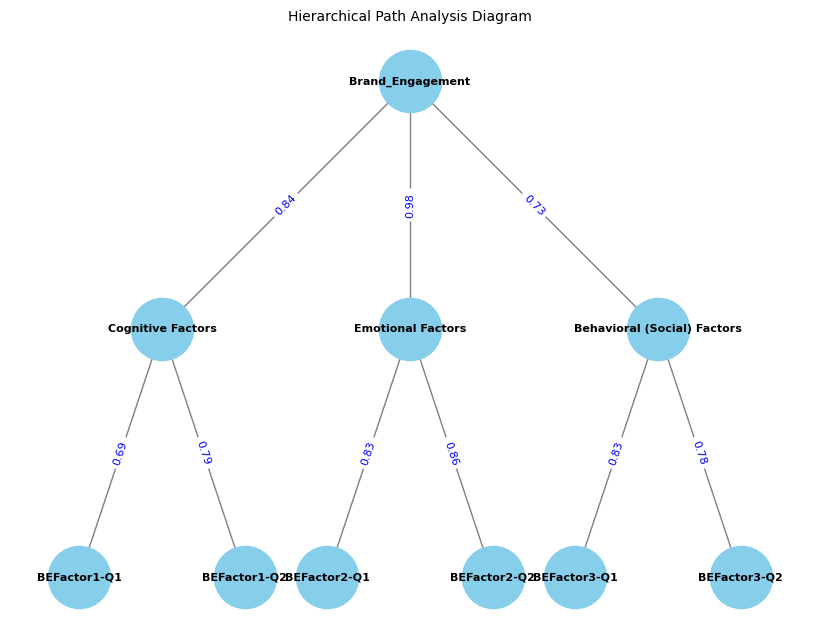

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# تعریف داده‌های نمونه برای params
params = pd.DataFrame({
    'op': ['~', '~', '~', '~', '~', '~', '~', '~', '~'],
    'lval': ['Brand_Engagement', 'Brand_Engagement', 'Brand_Engagement',
             'Cognitive Factors', 'Cognitive Factors', 'Emotional Factors',
             'Emotional Factors', 'Behavioral (Social) Factors', 'Behavioral (Social) Factors'],
    'rval': ['Cognitive Factors', 'Emotional Factors', 'Behavioral (Social) Factors',
             'BEFactor1-Q1', 'BEFactor1-Q2',
             'BEFactor2-Q1', 'BEFactor2-Q2',
             'BEFactor3-Q1', 'BEFactor3-Q2'],
    'Estimate': [0.84, 0.98, 0.73, 0.69, 0.79, 0.83, 0.86, 0.83, 0.78]
})

# تعریف داده‌های نمونه برای correlation_matrix
correlation_matrix = pd.DataFrame({
    'Cognitive Factors': [1, 0.3, 0.4],
    'Emotional Factors': [0.3, 1, 0.5],
    'Behavioral (Social) Factors': [0.4, 0.5, 1]
}, index=['Cognitive Factors', 'Emotional Factors', 'Behavioral (Social) Factors'])

# تابع برای رسم نمودار
def draw_path_diagram(params, corr_matrix):
    G = nx.Graph()  # استفاده از گراف بدون جهت

    # Add nodes and edges for the hierarchical path analysis with lines
    G.add_edges_from([
        ("BEFactor1-Q1", "Cognitive Factors"),
        ("BEFactor1-Q2", "Cognitive Factors"),
        ("BEFactor2-Q1", "Emotional Factors"),
        ("BEFactor2-Q2", "Emotional Factors"),
        ("BEFactor3-Q1", "Behavioral (Social) Factors"),
        ("BEFactor3-Q2", "Behavioral (Social) Factors"),
        ("Cognitive Factors", "Brand_Engagement"),
        ("Emotional Factors", "Brand_Engagement"),
        ("Behavioral (Social) Factors", "Brand_Engagement")
    ])

    # Get weights from path analysis results
    labels = {}
    for index, row in params.iterrows():
        if row['op'] == '~':
            if (row['rval'], row['lval']) in G.edges:  # Ensure the edge exists in the correct direction
                labels[(row['rval'], row['lval'])] = f"{row['Estimate']:.2f}"

    # Position settings for the nodes
    pos = {
        "Brand_Engagement": (0.5, 0.5),
        "Cognitive Factors": (0.2, 0.3),
        "Emotional Factors": (0.5, 0.3),
        "Behavioral (Social) Factors": (0.8, 0.3),
        "BEFactor1-Q1": (0.1, 0.1),
        "BEFactor1-Q2": (0.3, 0.1),
        "BEFactor2-Q1": (0.4, 0.1),
        "BEFactor2-Q2": (0.6, 0.1),
        "BEFactor3-Q1": (0.7, 0.1),
        "BEFactor3-Q2": (0.9, 0.1)
    }

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=8, font_weight='bold', edge_color='gray')

    # Display correlation values on edges
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='blue', font_size=8)

    plt.title("Hierarchical Path Analysis Diagram", fontsize=10)
    plt.show()

# Show the hierarchical path analysis diagram
draw_path_diagram(params, correlation_matrix)


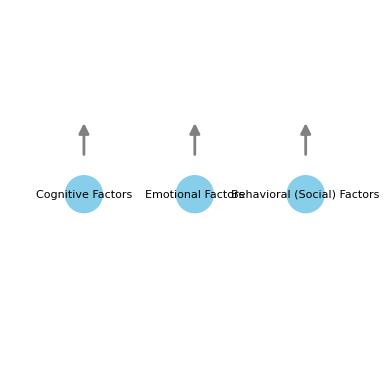

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# ایجاد یک شکل جدید
fig, ax = plt.subplots()

# رسم دایره‌ها
circle1 = plt.Circle((0.2, 0.5), 0.05, color='skyblue', ec='skyblue', label='Cognitive Factors')
circle2 = plt.Circle((0.5, 0.5), 0.05, color='skyblue', ec='skyblue', label='Emotional Factors')
circle3 = plt.Circle((0.8, 0.5), 0.05, color='skyblue', ec='skyblue', label='Behavioral (Social) Factors')
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)

# رسم فلش‌ها
arrow1 = patches.FancyArrowPatch((0.2, 0.6), (0.2, 0.7), color='gray', mutation_scale=15, arrowstyle='-|>', linewidth=2)
arrow2 = patches.FancyArrowPatch((0.5, 0.6), (0.5, 0.7), color='gray', mutation_scale=15, arrowstyle='-|>', linewidth=2)
arrow3 = patches.FancyArrowPatch((0.8, 0.6), (0.8, 0.7), color='gray', mutation_scale=15, arrowstyle='-|>', linewidth=2)
ax.add_patch(arrow1)
ax.add_patch(arrow2)
ax.add_patch(arrow3)

# اضافه کردن متن برای هر دایره
plt.text(0.2, 0.5, 'Cognitive Factors', ha='center', va='center', fontsize=8)
plt.text(0.5, 0.5, 'Emotional Factors', ha='center', va='center', fontsize=8)
plt.text(0.8, 0.5, 'Behavioral (Social) Factors', ha='center', va='center', fontsize=8)

# تنظیم محدوده محورها
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.axis('off')

plt.show()
